## Cài đặt thư viện

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 Review dữ liệu

### 1.1 Tổng quan dữ liệu

In [6]:
df = pd.read_csv("/content/drive/MyDrive/DataMining/Data/Raw/student_depression.csv")

Tạo df_student thu hẹp quy mô dữ liệu chứa các học sinh,nghề nghiệp cũng không được khác sinh viên

In [7]:
df_student = df[df['Profession'] == 'Student']

In [8]:
df_student.shape

(27870, 18)

In [9]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27870 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27870 non-null  int64  
 1   Gender                                 27870 non-null  object 
 2   Age                                    27870 non-null  float64
 3   City                                   27870 non-null  object 
 4   Profession                             27870 non-null  object 
 5   Academic Pressure                      27870 non-null  float64
 6   Work Pressure                          27870 non-null  float64
 7   CGPA                                   27870 non-null  float64
 8   Study Satisfaction                     27870 non-null  float64
 9   Job Satisfaction                       27870 non-null  float64
 10  Sleep Duration                         27870 non-null  object 
 11  Dietary

In [10]:
df_student.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [11]:
df_student.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [12]:
df_student.shape

(27870, 18)

In [13]:
df_student.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27867.000000,27870.000000
mean,70439.182634,25.821134,3.140617,0.000431,7.656028,2.943559,0.000682,7.157948,3.139520,0.585145
std,40633.159539,4.906574,1.381640,0.044016,1.470835,1.361209,0.044419,3.707180,1.437289,0.492706
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35055.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70654.500000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105813.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


### 1.2 Kiểm tra trùng lặp

In [14]:
df_student.duplicated().sum()
df_student[df_student.duplicated()]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


Có thể thấy bộ dữ liệu không có dữ liệu trùng lặp -> Lượt bỏ bước **handle duplicate value**

### 1.3 Kiểm tra missing value

In [15]:
df_student.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


Bộ dữ liệu rất tốt, chỉ có **3** missing value ở **financial_stress**

### 1.4  Kiểm tra giá trị unique

In [16]:
# Xem unique value cho từng cột
for col in df_student.columns:
    print(f"{col}: {df_student[col].unique()}")


id: [     2      8     26 ... 140689 140690 140699]
Gender: ['Male' 'Female']
Age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Profession: ['Student']
Academic Pressure: [5. 2. 3. 4. 1. 0.]
Work Pressure: [0. 5. 2.]
CGPA: [ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04    9.79
  8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25    7.83
  9.93    8.74    6.73

Dựa vào các giá trị unique của các cột, ta có thể đánh giá:
*   **City**, có giá trị không hợp lệ: 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi', 'City', '3.0','Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya', 'Gaurav','Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com', 'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'
*   **Financial Stress**: có nan cần được xử lý

*  **CGPA**: có giá trị 0 -> Nên được xem xét






In [17]:
df['City'].value_counts()

,count
City,
Kalyan,1570
Srinagar,1372
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


Các cột không hợp lệ hoặc chỉ xuất hiện rất ít sẽ được loại bỏ

### 1.5 Phát hiện ngoại lai

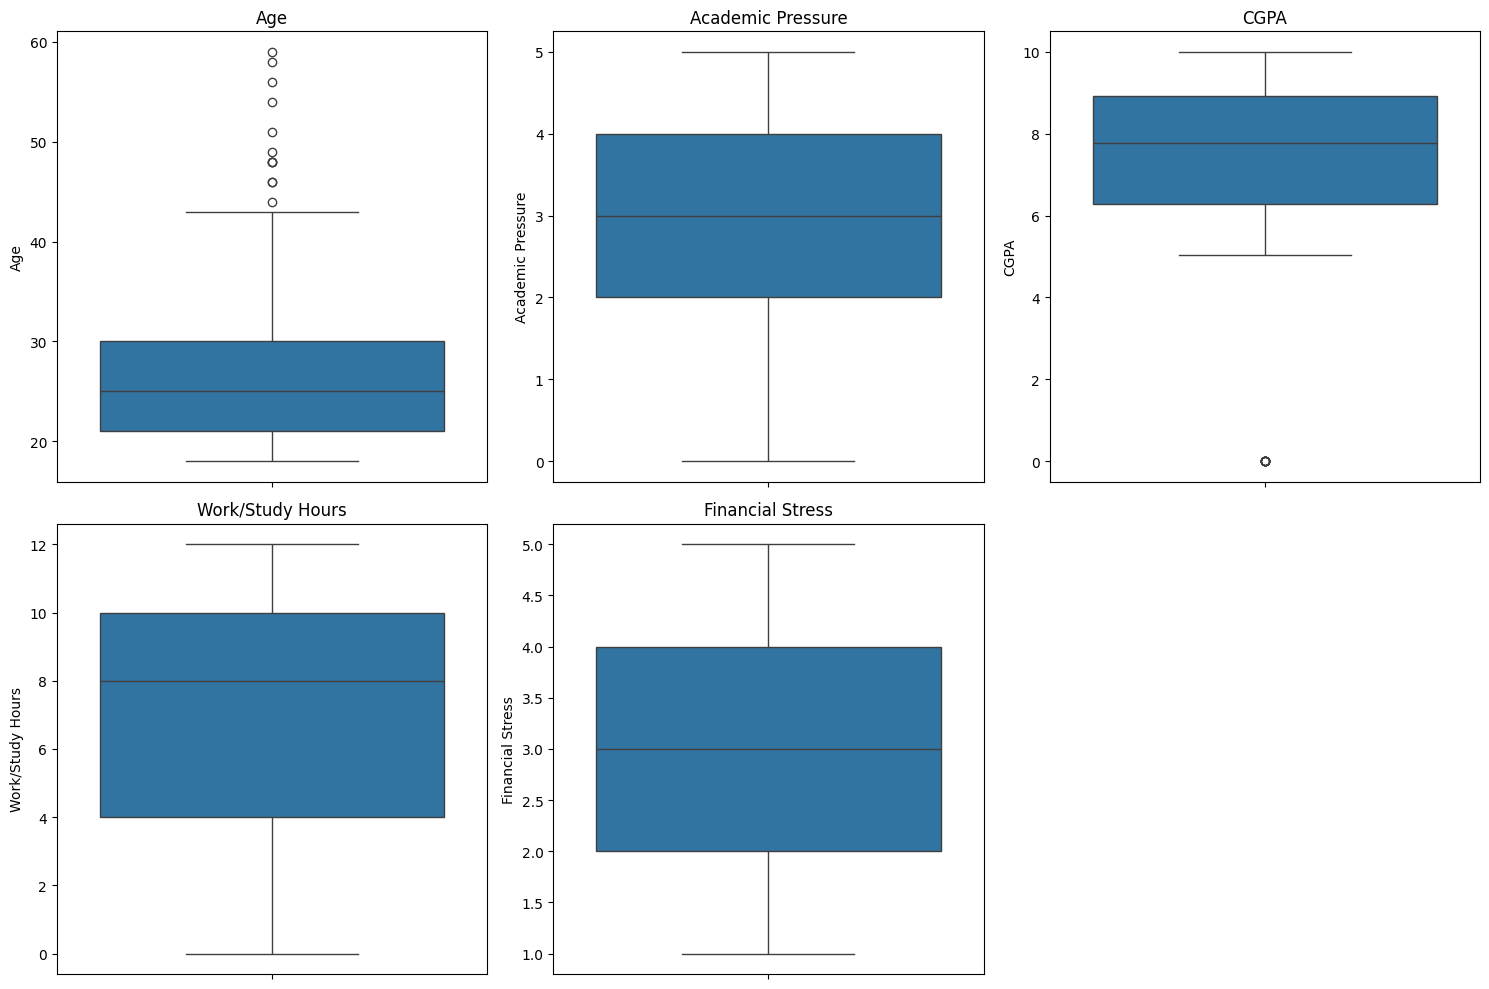

In [18]:
# Vẽ bằng IQR
# List các cột số muốn kiểm tra
numeric_cols = ['Age', 'Academic Pressure', 'CGPA',
                'Work/Study Hours', 'Financial Stress']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)  # Tùy số cột, chỉnh 2 hàng 4 cột
    sns.boxplot(y=df_student[col])
    plt.title(col)
plt.tight_layout()
plt.show()

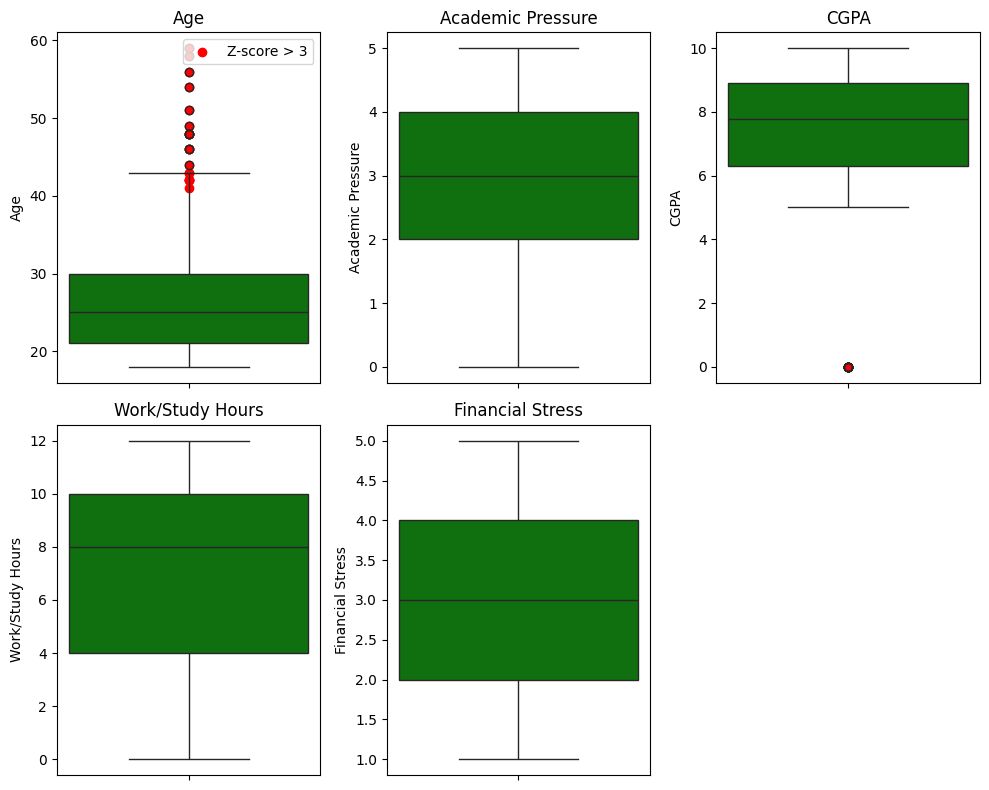

In [19]:
#Vẽ bằng Z-score
# Các cột số
numeric_cols = ['Age', 'Academic Pressure', 'CGPA',
                'Work/Study Hours', 'Financial Stress']

plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_cols):
    # Tính z-score
    z = (df_student[col] - df_student[col].mean()) / df_student[col].std()
    # Đánh dấu outlier
    outlier = np.abs(z) > 3
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df_student[col], color="green")
    plt.scatter(np.zeros_like(df_student[col][outlier]), df_student[col][outlier], color='red', label='Z-score > 3')
    plt.title(col)
    if i == 0:
        plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [20]:
# Outlier theo IQR
Q1 = df_student['CGPA'].quantile(0.25)
Q3 = df_student['CGPA'].quantile(0.75)
IQR = Q3 - Q1
outlier_iqr = (df_student['CGPA'] < Q1 - 1.5 * IQR) | (df_student['CGPA'] > Q3 + 1.5 * IQR)

# Outlier theo Z-score
z = (df_student['CGPA'] - df_student['CGPA'].mean()) / df_student['CGPA'].std()
outlier_z = np.abs(z) > 3

print('Số lượng outlier theo IQR:', outlier_iqr.sum())
print('Số lượng outlier theo Z-score:', outlier_z.sum())

Số lượng outlier theo IQR: 9
Số lượng outlier theo Z-score: 9


Từ 2 kỹ thuật phát hiện outliers trên đều cho thấy:
- Giá trị *CGPA*=0 là outlier nghiêm trọng (rất xa phân bố trung tâm).
- Các cột khác *(Age, Academic Pressure, Work/Study Hours, Financial Stress)* không có điểm ngoại lai.

In [21]:
# Những records có CGPA là điểm ngoại lai
df_student[outlier_iqr]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4365,21880,Male,38.0,Chennai,Student,0.0,5.0,0.0,0.0,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
10407,52737,Male,28.0,Vadodara,Student,3.0,0.0,0.0,4.0,0.0,Less than 5 hours,Healthy,BBA,No,12.0,2.0,No,0
11489,58062,Female,32.0,Vadodara,Student,5.0,0.0,0.0,0.0,0.0,Less than 5 hours,Unhealthy,Class 12,Yes,11.0,5.0,No,1
13909,70453,Female,20.0,Ahmedabad,Student,0.0,0.0,0.0,0.0,2.0,Less than 5 hours,Moderate,Class 12,Yes,12.0,3.0,Yes,1
14855,75007,Male,21.0,Lucknow,Student,0.0,2.0,0.0,0.0,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
20913,105773,Male,18.0,Ahmedabad,Student,0.0,0.0,0.0,0.0,1.0,Less than 5 hours,Moderate,Class 12,Yes,9.0,5.0,No,1
21805,110097,Male,34.0,Pune,Student,1.0,0.0,0.0,5.0,0.0,Less than 5 hours,Unhealthy,M.Ed,Yes,10.0,3.0,Yes,0
25746,129756,Male,18.0,Rajkot,Student,0.0,5.0,0.0,0.0,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1
26719,134830,Female,24.0,Meerut,Student,0.0,0.0,0.0,0.0,2.0,More than 8 hours,Unhealthy,Class 12,No,0.0,5.0,No,0


Kiểm tra thủ công xác nhận có 8 bản ghi có giá trị CGPA = 0

Các bản ghi này đồng thời có nhiều biến khác có giá trị thấp hoặc bằng 0 (ví dụ: Academic Pressure, Work Pressure), làm tăng khả năng đây là dữ liệu nhập sai hoặc thiếu.

**Đặc điểm giá trị bất thường:**

- Tần suất: 8/27,862 dòng (~0.03%)

- Tính hợp lệ: CGPA = 0 là bất hợp lý trong ngữ cảnh đánh giá kết quả học tập.

- Ảnh hưởng: Nếu giữ lại, có thể gây sai lệch thống kê mô tả và mô hình dự đoán.

**Phương pháp xử lý**

Do số lượng nhỏ và tính chất bất thường rõ ràng, nhóm phân tích quyết định: **Loại bỏ toàn bộ các bản ghi có CGPA = 0.**

Việc loại bỏ các bản ghi này giúp đảm bảo độ tin cậy và tính đại diện của dữ liệu mà không gây ảnh hưởng đáng kể đến quy mô mẫu.

## 2 Data Cleaning

###2.1 Chuẩn hóa tên cột

In [22]:
# Chuẩn hóa tên cột
def clean_column_names(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("?", "")
        .str.lower()
    )
    return df

In [23]:
df_cleaned = clean_column_names(df_student)

In [24]:
# đổi tên cột
df_cleaned = df_cleaned.rename(columns={'have_you_ever_had_suicidal_thoughts_': 'suicidal_thoughts', 'family_history_of_mental_illness': 'family_mental_history'})

In [25]:
df_cleaned.columns

Index(['id', 'gender', 'age', 'city', 'profession', 'academic_pressure',
       'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction',
       'sleep_duration', 'dietary_habits', 'degree', 'suicidal_thoughts',
       'work/study_hours', 'financial_stress', 'family_mental_history',
       'depression'],
      dtype='object')

### 2.2 Xử lý dữ liệu thiếu và dữ liệu không hợp lệ

In [26]:
# Những giá trị của 'financial_stress' là ? sẽ được thay thành nan
df_cleaned['financial_stress'] = df_cleaned['financial_stress'].replace('?', np.nan)

# Thay giá trị thiếu bằng median
df_cleaned['financial_stress'] = df_cleaned['financial_stress'].fillna(df_cleaned['financial_stress'].median())

In [27]:
# City
valid_cities = [
    'Visakhapatnam','Bangalore','Srinagar','Varanasi','Jaipur','Pune','Thane',
    'Chennai','Nagpur','Nashik','Vadodara','Kalyan','Rajkot','Ahmedabad',
    'Kolkata','Mumbai','Lucknow','Indore','Surat','Ludhiana','Bhopal',
    'Meerut','Agra','Ghaziabad','Hyderabad','Vasai-Virar','Kanpur','Patna',
    'Faridabad','Delhi'
]

# Những thành phố có tên không hợp lệ sẽ được gắn là 'Others'
df_cleaned['city'] = df_cleaned['city'].apply(lambda x: x if x in valid_cities else 'Others')

In [28]:
# Chuyển yes/no về 1/0
df_cleaned['suicidal_thoughts'] = df_cleaned['suicidal_thoughts'].map({'No': 0, 'Yes': 1})
df_cleaned['family_mental_history'] = df_cleaned['family_mental_history'].map({'No': 0, 'Yes': 1})

In [29]:
# Loại bỏ toàn bộ các bản ghi có CGPA = 0.
df_cleaned = df_cleaned[df_cleaned['cgpa'] != 0]

# Làm tròn CGPA về 2 chữ số thập phân
df_cleaned['cgpa'] = df_cleaned['cgpa'].round(2)

/tmp/ipython-input-29-3001908599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cgpa'] = df_cleaned['cgpa'].round(2)


In [30]:
for col in df_cleaned.columns:
  print(f"{col}: {df_cleaned[col].unique()}")

id: [     2      8     26 ... 140689 140690 140699]
gender: ['Male' 'Female']
age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 51. 44. 38. 43. 46. 59. 54. 48. 56. 37. 41.]
city: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Others']
profession: ['Student']
academic_pressure: [5. 2. 3. 4. 1. 0.]
work_pressure: [0.]
cgpa: [ 8.97  5.9   7.03  5.59  8.13  5.7   9.54  8.04  9.79  8.38  6.1   7.04
  8.52  5.64  8.58  6.51  7.25  7.83  9.93  8.74  6.73  5.57  8.59  7.1
  6.08  5.74  9.86  6.7   6.21  5.87  6.37  9.72  5.88  9.56  6.99  5.24
  9.21  7.85  6.95  5.86  7.92  9.66  8.94  9.71  7.87  5.6   7.9   5.46
  6.79  8.7   7.38  8.5   7.09  9.82  8.89  7.94  9.11  6.75  7.53  9.49
  9.

**Lưu ý**
Sau khi loại bỏ các bản ghi có CGPA=0, biến work_pressure không còn đa dạng giá trị (chỉ còn giá trị duy nhất 0). Do đó, biến này đã bị loại khỏi tập dữ liệu để tránh ảnh hưởng đến chất lượng phân tích.

### 2.3 Loại bỏ các cột không cần thiết

In [31]:
# Loại bỏ cột Profession vì chỉ còn mỗi giá trị 'Student'
df_cleaned = df_cleaned.drop(columns=['profession'])

In [32]:
# Loại bỏ cột 'work_pressure'
df_cleaned = df_cleaned.drop(columns=['work_pressure'])

In [33]:
# Xem các giá trị cột job_satisfaction
df_cleaned['job_satisfaction'].value_counts()

,count
job_satisfaction,
0.0,27859
3.0,1
2.0,1


- Ta cũng nhận thấy cột job_satisfaction chỉ có một giá trị 3 và 1 giá trị 2 nên ta cũng sẽ bỏ cột này

In [34]:
df_cleaned = df_cleaned.drop(columns='job_satisfaction')

In [35]:
df_cleaned['depression'].value_counts()

,count
depression,
1,16304
0,11557


In [36]:
df_cleaned.head()

,id,gender,age,city,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work/study_hours,financial_stress,family_mental_history,depression
0,2,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,26,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,30,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0


##3 Data Exploration & Visualization (EDA)

In [37]:
df_explore = df_cleaned.copy()

###3.1 Phân phối tổng thể biến target (Depression)

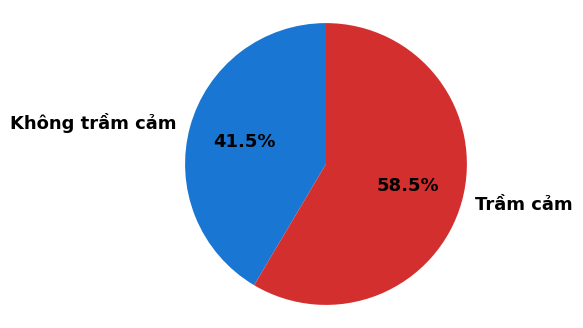

In [38]:
counts = df_explore['depression'].value_counts().sort_index()
labels = ['Không trầm cảm', 'Trầm cảm']
colors = ['#1976D2', '#D32F2F']

plt.figure(figsize=(4,4))
plt.pie(
    counts,
    labels=labels,
    autopct=lambda pct: f"{pct:.1f}%",
    startangle=90,
    colors=colors,
    textprops={'fontsize': 13, 'fontweight': 'bold'}
)

plt.axis('equal')  # Hình tròn đều

plt.show()

- Đây là tỉ lệ chấp nhận được trong một dataset (khá cân bằng). Tỉ lệ này giúp ta đưa ra cái nhìn tổng quan về các yếu tố có hoặc không ảnh hưởng đến việc có bị trầm cảm hay không khi đang học tại các ngôi trường đại học.

###3.2 Sự phân tán các biến phân loại

####3.2.1 Giới tính

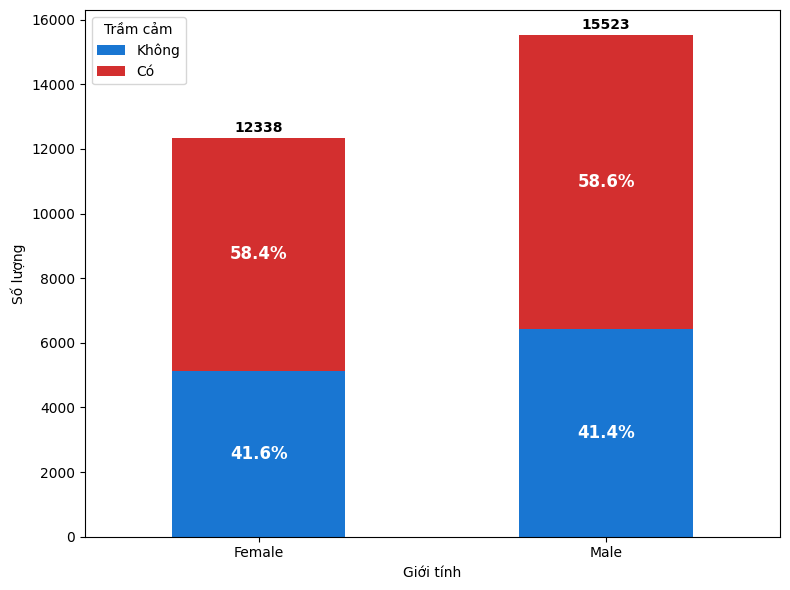

In [39]:
# Tạo bảng tần suất
pivot = pd.crosstab(df_explore['gender'], df_explore['depression'])

# Vẽ stacked bar chart
ax = pivot.plot(
    kind='bar',
    stacked=True,
    color=['#1976D2', '#D32F2F'],
    figsize=(8,6)
)

plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.legend(title='Trầm cảm', labels=['Không', 'Có'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()

# Thêm số lượng tổng trên đầu mỗi cột
for i, total in enumerate(pivot.sum(axis=1)):
    ax.text(i, total + 100, str(total), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Thêm phần trăm depression=1 ở giữa cột (tùy chỉnh vị trí cho đẹp)
for i, (no, yes) in enumerate(zip(pivot[0], pivot[1])):
    percent_yes = yes / (no + yes) * 100
    percent_no = 100-percent_yes
    # Vị trí: giữa phần màu đỏ (cột depression=1)
    ax.text(i, no + yes/2, f'{percent_yes:.1f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    # Phần màu xanh
    ax.text(i, no / 2, f'{percent_no:.1f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.show()

- Nhìn chung, số lượng Male và Female có chênh lệch nhưng tỉ lệ trầm cảm ở cả 2 giới tính khá giống nhau. Điều này cho thấy mức độ trầm cảm không ảnh hưởng đến giới tính. Nghĩa là nam vẫn có thể bị trầm cảm và nữ cũng không ngoại lệ.

=> Giới tính dường như không phải là yếu tố quyết định chính đến khả năng bị trầm cảm trong tập mẫu này.

####3.2.2 Tuổi

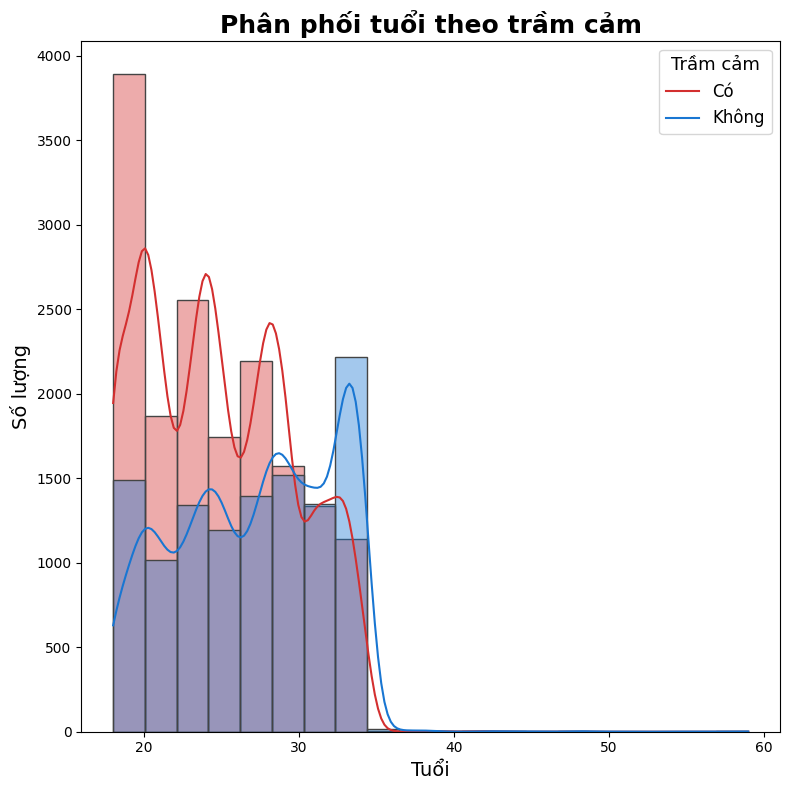

In [40]:
plt.figure(figsize=(8, 8))
ax = sns.histplot(
    data=df_explore,
    x='age',
    hue='depression',
    hue_order=[0, 1],
    palette={0: "#1976D2",  # Không trầm cảm → xanh
             1: "#D32F2F"}, # Có trầm cảm    → đỏ
    bins=20,
    kde=True,
    stat='count',
    common_norm=False,
    alpha=0.4,
    edgecolor='#444444'
)

# Đặt lại title, nhãn trục
ax.set_title('Phân phối tuổi theo trầm cảm', fontsize=18, fontweight='bold')
ax.set_xlabel('Tuổi', fontsize=14)
ax.set_ylabel('Số lượng', fontsize=14)

# Gọi legend với đúng labels và màu đã map
ax.legend(title="Trầm cảm",
          labels=["Có", "Không"],
          title_fontsize=13,
          fontsize=12,
          loc='upper right')

plt.tight_layout()
plt.show()

- Chủ yếu tuổi phân bố tập trung từ dưới 20 đến 36 nên ta sẽ vẽ lại biểu đồ tập trung ở độ tuổi đó để có thể đưa ra thêm các phân tích sâu hơn cho bộ dữ liệu.

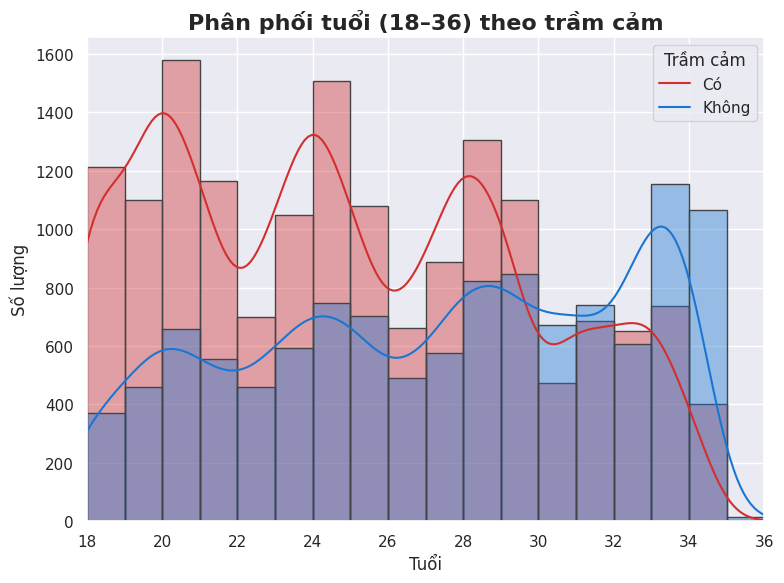

In [41]:
# Lọc data chỉ giữ age từ 20 đến 36
df_sub = df_explore[(df_explore['age'] >= 18) & (df_explore['age'] <= 36)]

plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')

ax = sns.histplot(
    data=df_sub,
    x='age',
    hue='depression',
    hue_order=[0, 1],
    palette={0: "#1976D2",  # Không trầm cảm → xanh dương #1976D2
             1: "#D32F2F"}, # Có trầm cảm     → đỏ #D32F2F
    bins=18,
    kde=True,
    stat='count',
    common_norm=False,
    alpha=0.4,
    edgecolor='#444444'
)

# Giới hạn trục x chỉ 18–36
ax.set(xlim=(18, 36))

# Tiêu đề & nhãn
ax.set_title('Phân phối tuổi (18–36) theo trầm cảm', fontsize=16, fontweight='bold')
ax.set_xlabel('Tuổi', fontsize=12)
ax.set_ylabel('Số lượng', fontsize=12)
ax.legend(labels=["Có", "Không"],
          title="Trầm cảm",
          title_fontsize=12,
          fontsize=11,
          loc='upper right')

plt.tight_layout()
plt.show()

- Ở độ tuổi trẻ (18 – 24), số bạn có trầm cảm luôn nhỉnh hơn rõ rệt so với số bạn không trầm cảm.

- Trong khoảng 25 – 30 tuổi, hai nhóm có mức độ gần nhau hơn, nhưng nhóm “có trầm cảm” vẫn hơi chiếm ưu thế cho đến khoảng 28 tuổi.

- Từ 31 – 36 tuổi ngược lại, số bạn không trầm cảm vượt lên, đặc biệt đỉnh ở 34 tuổi.

=> **Tóm lại**:Sinh viên mới vào đại học (18 – 22) dễ gặp stress, áp lực học tập, dẫn đến tỷ lệ trầm cảm cao. Sự “ổn định” khi lớn hơn, những bạn 30 – 36 tuổi có thể đã thích nghi tốt hơn với guồng học/tìm việc và ít bị trầm cảm. Vùng “giao thoa” (25 – 30 tuổi), đây là đối tượng tiềm ẩn – cần kết hợp thêm biến academic_pressure, social_support,… để giải thích tại sao cùng lứa tuổi vẫn có bạn trầm/nổ trầm khác nhau.



####3.2.3 Điểm cgpa

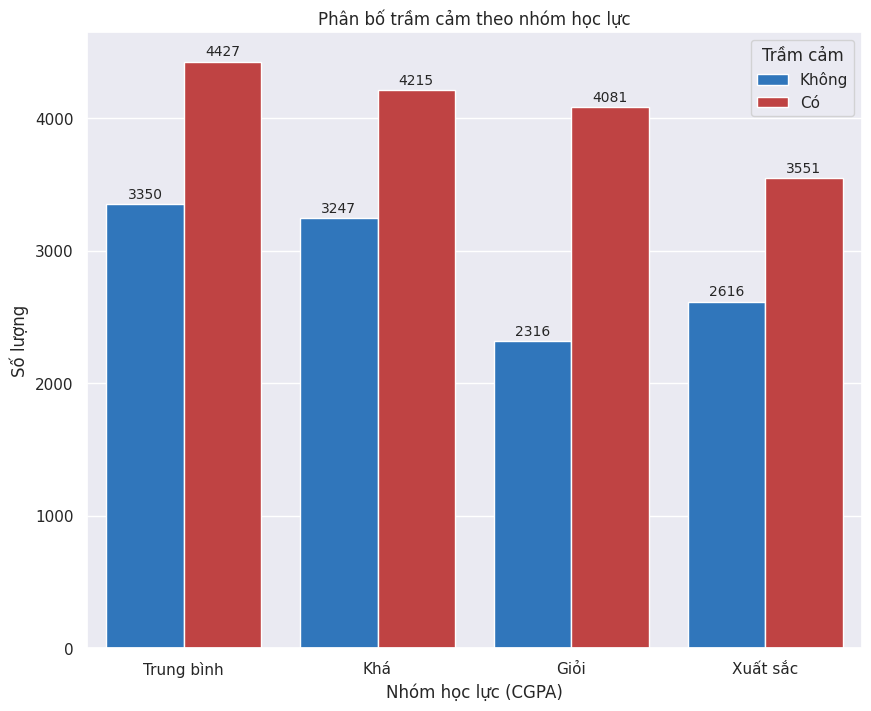

In [42]:
#Theo điểm cgpa
bins = [5, 6.5, 8, 9, 10]
labels = ['Trung bình', 'Khá', 'Giỏi', 'Xuất sắc']
df_explore['cgpa_group'] = pd.cut(df_explore['cgpa'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10,8))
ax = sns.countplot(x='cgpa_group', hue='depression', data=df_explore, palette=['#1976D2', '#D32F2F'])
plt.xlabel("Nhóm học lực (CGPA)")
plt.ylabel("Số lượng")
plt.title("Phân bố trầm cảm theo nhóm học lực")
plt.legend(title='Trầm cảm', labels=['Không', 'Có'])
for con in ax.containers:
  ax.bar_label(con, padding=2, fontsize=10)
plt.show()

*   Dễ nhận thấy ở mọi nhóm học lực, số sinh viên bị mắc chừng trầm cảm luôn cao. Điều này cho biết trầm cảm là một vấn đề khá phổ biến ở mọi đối tưởng học lực, không chỉ riêng học lực mạnh hay yếu.
*   Số lượng sinh viên trầm cảm giảm dần từ Trung bình đến Xuất sắc, điều nay có thể là do số lượng sinh viên của các học lực này cũng giảm dần.
*   Tỷ lệ trầm cảm của nhóm Giỏi cao bất thường:
  - “Trung bình”: 4427/7777 ≈ 56.9%
  - “Khá”: 4215/7462 ≈ 56.5%
  -“Giỏi”: 4081/6397 ≈ 63.8%
  -“Xuất sắc”: 3551/6167 ≈ 57.6%
  - Điều này có thể là do áp lực duy trì thành tích học tập, kì vọng cao.
*  Nhóm "Xuất sắc" có số lượng trầm cảm thấp nhất về số tuyệt đối và tương đối, có thể do nhóm này đã đạt được sự tự tin, cân bằng tâm lý, hoặc số lượng mẫu cũng ít hơn các nhóm còn lại.

=> Đây cũng là một khía cạnh nên đào sâu để đưa ra các suy luận đúng đắn.



####3.2.4 Suy nghĩ tiêu cực

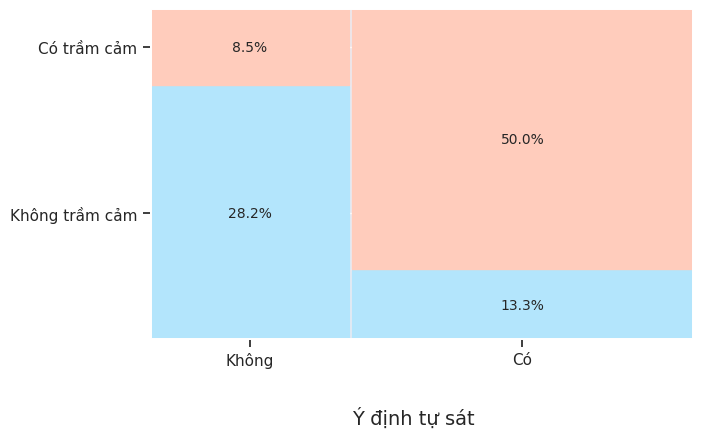

In [43]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt


# Tạo bảng tần suất (ý định tự sát x trầm cảm)
cross_tab = df_explore.groupby(['suicidal_thoughts', 'depression']).size().unstack()
cross_tab.columns = ['Không trầm cảm', 'Có trầm cảm']
cross_tab.index = ['Không', 'Có']

# Tính tổng để lấy % từng nhóm
total = cross_tab.values.sum()

# Hàm chèn % vào ô
def labelizer(key):
    count = cross_tab.loc[key[0], key[1]]
    pct = 100 * count / total
    return f"{pct:.1f}%"

# Màu pastel tương phản
def props(key):
    return {'color': '#b3e5fc' if key[1] == 'Không trầm cảm' else '#ffccbc'}

fig, ax = plt.subplots(figsize=(7,5))
mosaic(
    cross_tab.stack(),
    labelizer=labelizer,
    properties=props,
    ax=ax
)

# Thêm chữ ở giữa dưới trục x
fig.subplots_adjust(bottom=0.22)  # tăng khoảng trống dưới
fig.text(0.5, 0.05, 'Ý định tự sát', ha='center', fontsize=14)

plt.ylabel('Trầm cảm', fontsize=12)
plt.show()


- Phần lớn sinh viên có ý định tự sát cũng bị trầm cảm chiếm 50% số mẫu – đây là tỷ lệ cực kỳ cao. Điều này khẳng định mối liên hệ rất chặt giữa trầm cảm và ý định tự sát trong tập dữ liệu.
- Sinh viên không có ý định tự sát nhưng vẫn bị trầm cảm mặc dù chỉ với tỉ lệ thấp (8,5%), nhưng cũng chỉ ra ý định tự sát chỉ là nguy cơ, không phải là điều kiện đủ cho việc bị trầm cảm.
- Ta cũng dễ dàng nhận ra lượng sinh viên có ý định tự sát chiếm đến gần 2/3, chiều rộng cột gần gấp đôi cột không có ý định tự sát. Vấn đề tự sát cũng đang là vấn đề báo động trong môi trường học tập.
- Một bộ phận nhỏ sinh viên không bị trầm cảm nhưng vẫn có ý định tự sát(13,3%)
- Số sinh viên “bình thường” (không trầm cảm, không ý định tự sát) chỉ chiếm khoảng 28.2% tổng số mẫu, cho thấy **sức khỏe tâm thần là vấn đề lớn trong tập dữ liệu này.**

####3.2.5 Thói quen ăn uống

In [44]:
#Kiểm tra các giá trị
stats = df_explore['dietary_habits'].value_counts().reset_index()
stats.columns = ['dietary_habits', 'Count']
stats['Percentage'] = (stats['Count'] / len(df_explore)) * 100

print(f"\nPhân phối 'dietary_habits':")
display(stats.style.format({"Percentage": "{:.2f}%"}).bar(subset=['Percentage'], color='#1976D2'))



Phân phối 'dietary_habits':


,dietary_habits,Count,Percentage
0,Unhealthy,10306,36.99%
1,Moderate,9906,35.56%
2,Healthy,7637,27.41%
3,Others,12,0.04%


- Có thể thấy Others có tỉ lệ rất thấp ~ 0,004, ta sẽ điền mode vào các giá trị đó để không làm mất giá trị các cột khác.

In [45]:
#Điền giá trị Others bằng mode
df_explore['dietary_habits'] = df_explore['dietary_habits'].replace('Others', df_explore['dietary_habits'].mode()[0])

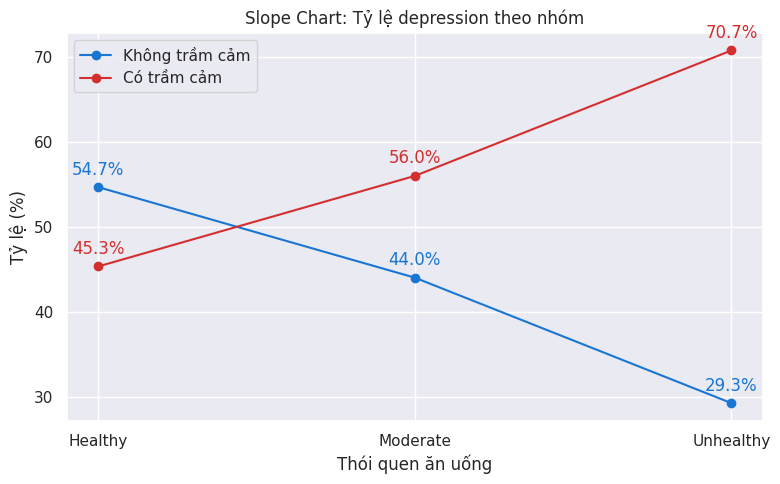

In [46]:
# Bảng chéo
ct = pd.crosstab(df_explore['dietary_habits'], df_explore['depression'])
# # Tính tỷ lệ
ratio = ct.div(ct.sum(axis=1), axis=0) * 100
plt.figure(figsize=(8,5))
for col, color in zip([0,1], ['#1976D2','#D32F2F']):
    plt.plot(ratio.index, ratio[col], marker='o', label='Không trầm cảm' if col==0 else 'Có trầm cảm', color=color)
    for x, y in zip(ratio.index, ratio[col]):
        plt.text(x, y+1, f"{y:.1f}%", color=color, ha='center', va='bottom')
plt.ylabel('Tỷ lệ (%)')
plt.xlabel('Thói quen ăn uống')
plt.title('Slope Chart: Tỷ lệ depression theo nhóm')
plt.legend()
plt.tight_layout()
plt.show()

- Tỉ lệ có trầm cảm tăng dần khi thói quen ăn uống bớt lành mạnh. Đỉnh điểm khả năng bị trầm cảm lên đến 70,7% khi ăn uống không lành mạnh.
-Ngược lại, khi thay đổi thói quen ăn uống Healthy hơn, tỉ lệ trầm cảm sẽ giảm.Nên cần ăn uống kết hợp với tập luyện sẽ cho ra kết quả tốt hơn.
- Tuy nhiên, ở nhóm sinh viên ăn uống Healthy, tỉ lệ trầm cảm cũng ở mức khá cao gần 50%. Mặc dù tỉ lệ trầm cảm sẽ giảm khi ăn uống Healthy nhưng khi có các yếu tố khác bên ngoài tác động thì vẫn có khả năng bị trầm cảm đối với nhóm  người này.

=> Chế độ ăn uống càng thiếu lành mạnh, tỷ lệ sinh viên bị trầm cảm càng tăng mạnh.

###3.3 Sự phân tán các biến Numerical

In [47]:
df_explore

,id,gender,age,city,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work/study_hours,financial_stress,family_mental_history,depression,cgpa_group
0,2,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1,Giỏi
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0,Trung bình
2,26,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0,Khá
3,30,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1,Trung bình
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0,Giỏi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,5.0,5.75,5.0,5-6 hours,Unhealthy,Class 12,1,7.0,1.0,1,0,Trung bình
27897,140686,Male,27.0,Ludhiana,2.0,9.40,3.0,Less than 5 hours,Healthy,MSc,0,0.0,3.0,1,0,Xuất sắc
27898,140689,Male,31.0,Faridabad,3.0,6.61,4.0,5-6 hours,Unhealthy,MD,0,12.0,2.0,0,0,Khá
27899,140690,Female,18.0,Ludhiana,5.0,6.88,2.0,Less than 5 hours,Healthy,Class 12,1,10.0,5.0,0,1,Khá


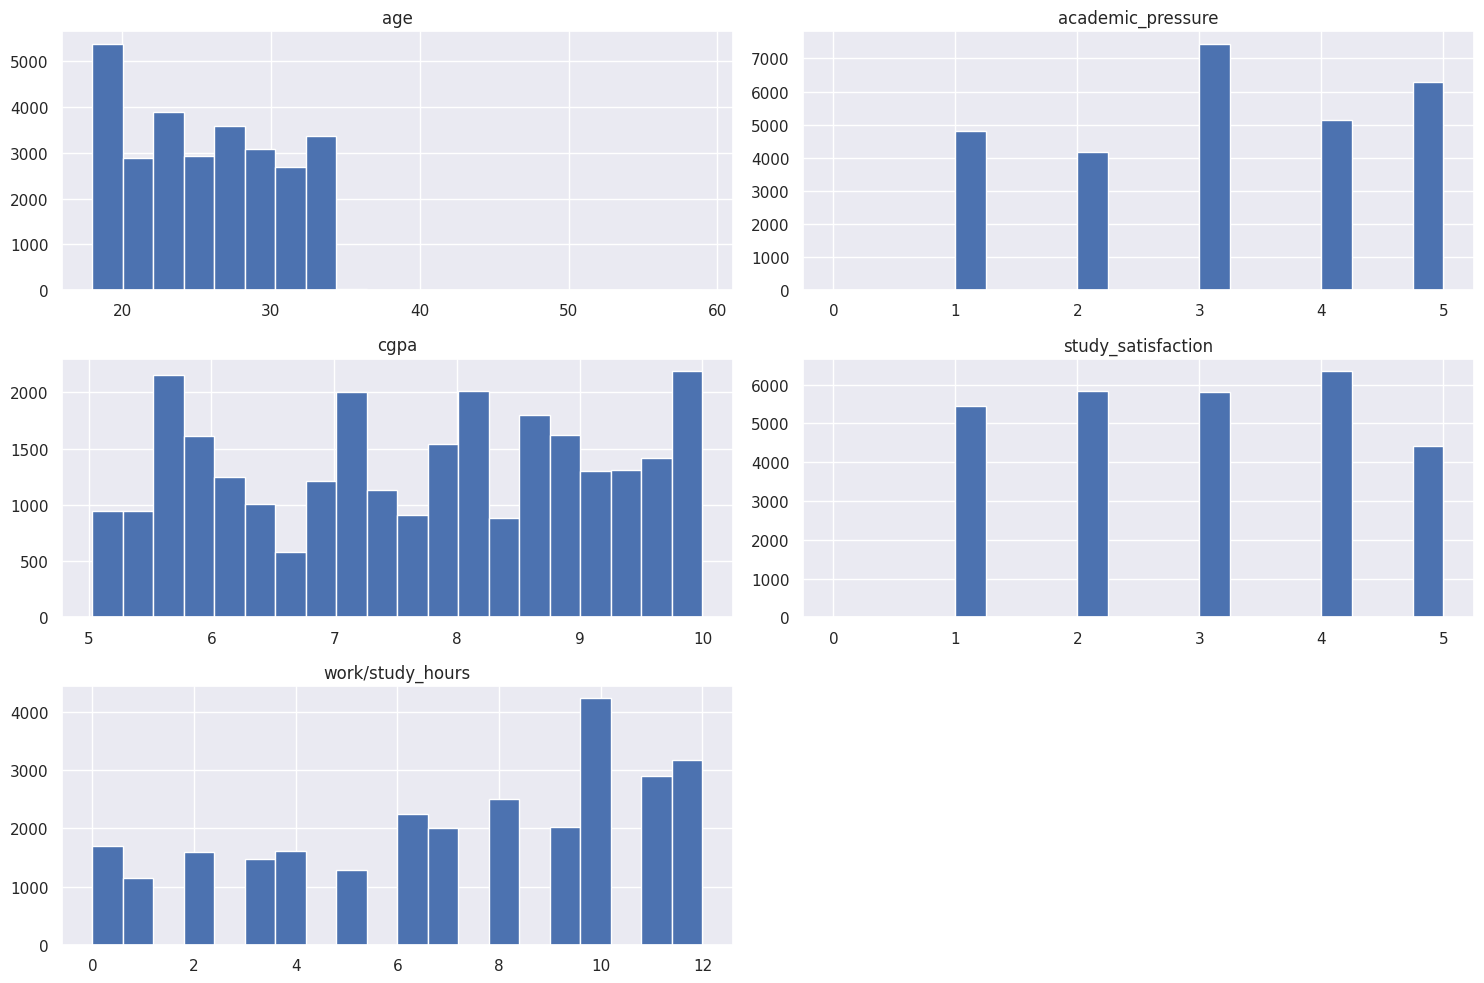

In [48]:
num_features = ['age', 'academic_pressure', 'cgpa',
                'study_satisfaction', 'work/study_hours']
df_explore[num_features].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

- Sinh viên chủ yếu trong độ tuổi 18 - 25, có CGPA khá cao, thường chịu áp lực học tập trung bình đến cao và dành nhiều thời gian cho học tập/làm việc. Đa số sinh viên cảm thấy hài lòng với việc học của mình.

###3.4 Phân tích sự tương quan

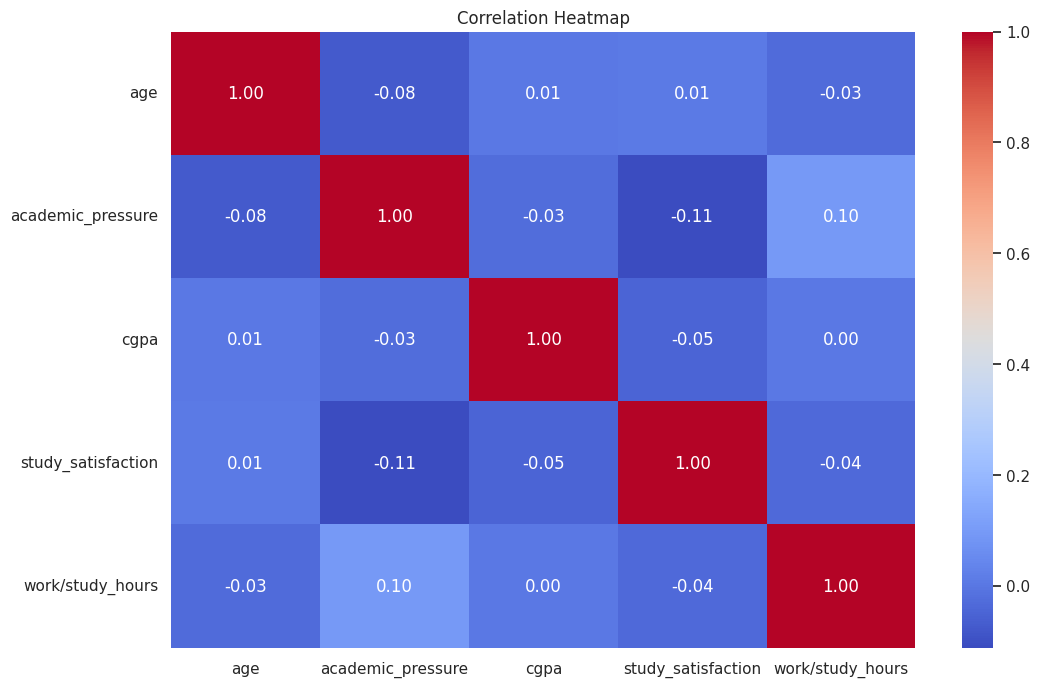

In [49]:
plt.figure(figsize=(12,8))
num_features = ['age', 'academic_pressure', 'cgpa',
                'study_satisfaction', 'work/study_hours']
corr_matrix = df_explore[num_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- academic_pressure và study_satisfaction có hệ số tương quan âm đáng chú ý là -0.11, cho thấy áp lực học tập cao hơn có xu hướng đi kèm với sự hài lòng về học tập thấp hơn, tuy nhiên tương quan này rất yếu.

- academic_pressure và work/study_hours có tương quan dương nhẹ (0.10), thể hiện rằng áp lực học tập cao hơn một chút khi sinh viên dành nhiều thời gian hơn cho việc học/làm, tuy nhiên cũng khá yếu và không rõ ràng.

- Biến age, cgpa, và work/study_hours gần như không có mối liên hệ đáng kể với các biến còn lại.


Tóm lại, các biến số này khá độc lập với nhau. Khi xây dựng mô hình khai phá dữ liệu, các biến này có thể được giữ lại mà không cần lo ngại nhiều về hiện tượng đa cộng tuyến.Tuy nhiên, cần lưu ý rằng các biến này có thể có mối quan hệ phi tuyến hoặc phức tạp hơn mà heatmap này chưa thể hiện được.

## 4 Data Transformation

### 4.1 Encoding biến phân loại

In [50]:
# Sao chép DataFrame đã làm sạch từ bước trước để giữ nguyên dữ liệu gốc
df_transformed = df_cleaned.copy()

In [51]:
# Label Encoding nhị phân
df_transformed['gender'] = df_cleaned['gender'].map({'Male':0, 'Female':1})
df_transformed['suicidal_thoughts'] = df_cleaned['suicidal_thoughts']
df_transformed['family_mental_history'] = df_cleaned['family_mental_history']

In [52]:
# Map giá trị sleep_duration thành số có thứ tự
sleep_map = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4,
    'Others': 0
}
df_transformed['sleep_duration'] = df_transformed['sleep_duration'].map(sleep_map)

Thời gian ngủ có thứ tự rõ rệt (ngủ nhiều hơn → giá trị cao hơn).

Mô hình hiểu rằng ngủ 7–8 giờ > ngủ 5–6 giờ.


In [53]:
# Map dietary_habits thành số thứ tự
diet_map = {
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3,
    'Others': 0
}
df_transformed['dietary_habits'] = df_transformed['dietary_habits'].map(diet_map)


In [54]:
print(df_transformed.columns)


Index(['id', 'gender', 'age', 'city', 'academic_pressure', 'cgpa',
       'study_satisfaction', 'sleep_duration', 'dietary_habits', 'degree',
       'suicidal_thoughts', 'work/study_hours', 'financial_stress',
       'family_mental_history', 'depression'],
      dtype='object')


Mức độ "Healthy" > "Moderate" > "Unhealthy".



In [55]:
# One-Hot Encoding City
city_dummies = pd.get_dummies(df_transformed['city'], prefix='city', drop_first=True)

# One-Hot Encoding Degree
degree_dummies = pd.get_dummies(df_transformed['degree'], prefix='degree', drop_first=True)

# Nối các cột mới
df_transformed = pd.concat([df_transformed, city_dummies, degree_dummies], axis=1)

# Bỏ cột gốc
df_transformed.drop(['city', 'degree'], axis=1, inplace=True)


 * encode Label Encoding → chỉ DT chạy ngon, còn các mô hình khác còn lại hiểu sai thứ tự.
 * One-Hot Encoding → tất cả mô hình đều chạy được.
 * Vì vậy giải pháp an toàn nhất:
One-Hot Encoding + Scaling dữ liệu số.

Mỗi giá trị phân loại được biến thành 0/1 để mô hình hiểu.

Tránh giả định thứ tự giữa các giá trị (ví dụ: profession = Doctor > Student).

In [56]:
print(df_transformed.columns)


Index(['id', 'gender', 'age', 'academic_pressure', 'cgpa',
       'study_satisfaction', 'sleep_duration', 'dietary_habits',
       'suicidal_thoughts', 'work/study_hours', 'financial_stress',
       'family_mental_history', 'depression', 'city_Ahmedabad',
       'city_Bangalore', 'city_Bhopal', 'city_Chennai', 'city_Delhi',
       'city_Faridabad', 'city_Ghaziabad', 'city_Hyderabad', 'city_Indore',
       'city_Jaipur', 'city_Kalyan', 'city_Kanpur', 'city_Kolkata',
       'city_Lucknow', 'city_Ludhiana', 'city_Meerut', 'city_Mumbai',
       'city_Nagpur', 'city_Nashik', 'city_Others', 'city_Patna', 'city_Pune',
       'city_Rajkot', 'city_Srinagar', 'city_Surat', 'city_Thane',
       'city_Vadodara', 'city_Varanasi', 'city_Vasai-Virar',
       'city_Visakhapatnam', 'degree_B.Com', 'degree_B.Ed', 'degree_B.Pharm',
       'degree_B.Tech', 'degree_BA', 'degree_BBA', 'degree_BCA', 'degree_BE',
       'degree_BHM', 'degree_BSc', 'degree_Class 12', 'degree_LLB',
       'degree_LLM', 'degree_

###4.2 Scaling các biến số liên tục

Chuẩn hóa thành phân phối chuẩn (mean=0, std=1).


In [57]:
from sklearn.preprocessing import StandardScaler

# Danh sách cột
cols_to_scale = [
    'age', 'cgpa', 'academic_pressure',
    'study_satisfaction',
    'work/study_hours', 'financial_stress'
]

# Khởi tạo scaler
scaler = StandardScaler()

# Fit-transform
df_transformed[cols_to_scale] = scaler.fit_transform(df_transformed[cols_to_scale])

Giúp thuật toán tối ưu hóa nhanh hơn.

Các biến không bị lệch do thang đo khác nhau (ví dụ CGPA ~9, financial_stress ~1-5).

###4.3 Tạo đặc trưng mới

Nhóm thời lượng ngủ >=7 giờ thành Adequate=1, còn lại=0.


In [58]:
# 3,4 là từ 7-8 và >8 hours
# Nhóm >=7 giờ thành Adequate=1, còn lại=0
df_transformed['sleep_adequate'] = df_transformed['sleep_duration'].apply(lambda x: 1 if x >=3 else 0)

Nhiều nghiên cứu chỉ ra ngủ >=7 giờ giúp giảm stress.


Tạo biến đánh dấu stress học tập cao.


In [59]:
# Vì đã chuẩn hóa, median=0
df_transformed['high_academic_pressure'] = df_transformed['academic_pressure'].apply(lambda x: 1 if x > 0 else 0)

Học sinh có áp lực cao thường dễ stress và trầm cảm.

In [60]:
df_transformed['stress_interaction'] = df_transformed['financial_stress'] * df_transformed['academic_pressure']

Tương tác giữa tài chính và học tập thường làm tăng nguy cơ trầm cảm.


###4.4 Kiểm tra kết quả cuối cùng

In [61]:
print("Kích thước cuối cùng:", df_transformed.shape)
print("Số NaN còn lại:", df_transformed.isnull().sum().sum())
df_transformed.describe()




Kích thước cuối cùng: (27861, 73)
Số NaN còn lại: 0


,id,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,suicidal_thoughts,work/study_hours,financial_stress,family_mental_history,depression,sleep_adequate,high_academic_pressure,stress_interaction
count,27861.000000,27861.000000,2.786100e+04,2.786100e+04,2.786100e+04,2.786100e+04,27861.000000,27861.000000,27861.000000,2.786100e+04,2.786100e+04,27861.000000,27861.000000,27861.000000,27861.000000,27861.000000
mean,70434.708912,0.442841,5.279148e-17,-1.897433e-16,-7.661141e-16,-1.438377e-16,2.397294,1.903342,0.632605,7.268392e-18,1.147641e-17,0.483938,0.585191,0.479846,0.410430,0.152073
std,40633.834254,0.496731,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.127916,0.797760,0.482104,1.000018e+00,1.000018e+00,0.499751,0.492698,0.499603,0.491921,0.985227
min,2.000000,0.000000,-1.594302e+00,-2.274721e+00,-1.794696e+00,-2.163993e+00,0.000000,0.000000,0.000000,-1.930955e+00,-1.488479e+00,0.000000,0.000000,0.000000,0.000000,-2.944831
25%,35046.000000,0.000000,-9.827641e-01,-8.264577e-01,-9.343891e-01,-6.939826e-01,1.000000,1.000000,0.000000,-8.518804e-01,-7.927117e-01,0.000000,0.000000,0.000000,0.000000,-0.132470
50%,70650.000000,0.000000,-1.673803e-01,-1.023261e-01,7.612978e-02,4.102269e-02,2.000000,2.000000,1.000000,2.271939e-01,-9.694442e-02,0.000000,1.000000,0.000000,0.000000,0.080120
75%,105810.000000,1.000000,8.518494e-01,6.218056e-01,8.613303e-01,7.760280e-01,3.000000,3.000000,1.000000,7.667311e-01,5.988228e-01,1.000000,1.000000,1.000000,1.000000,0.804983
max,140699.000000,1.000000,6.763382e+00,1.345937e+00,1.598736e+00,1.511033e+00,4.000000,3.000000,1.000000,1.306268e+00,1.294590e+00,1.000000,1.000000,1.000000,1.000000,3.385874


In [62]:
# Tính tổng số NaN trên từng cột
nan_counts = df_transformed.isnull().sum()

# Chỉ chọn những cột có ít nhất 1 giá trị NaN
nan_counts = nan_counts[nan_counts > 0]

# In ra danh sách cột và số lượng NaN của từng cột
print(nan_counts)

Series([], dtype: int64)


In [63]:
print("NaN còn lại:", df_transformed.isnull().sum().sum())
df_transformed.head(5)

NaN còn lại: 0


,id,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,suicidal_thoughts,work/study_hours,...,degree_MCA,degree_MD,degree_ME,degree_MHM,degree_MSc,degree_Others,degree_PhD,sleep_adequate,high_academic_pressure,stress_interaction
0,2,0,1.463387,1.345937,0.895469,-0.693983,2,3,1,-1.121649,...,False,False,False,False,False,False,False,0,1,-2.003399
1,8,1,-0.371226,-0.826458,-1.200674,1.511033,2,2,0,-1.121649,...,False,False,False,False,False,False,False,0,0,0.655143
2,26,0,1.055695,-0.102326,-0.429130,1.511033,1,3,0,0.496962,...,False,False,False,False,False,False,False,0,0,0.152310
3,30,1,0.444157,-0.102326,-1.412337,-0.693983,3,2,1,-0.851880,...,False,False,False,False,False,False,False,1,0,-0.132470
4,32,1,-0.167380,0.621806,0.321932,0.041023,2,2,1,-1.661186,...,False,False,False,False,False,False,False,0,1,-0.925545


## 5 Modeling – Huấn luyện mô hình dự đoán

##5.1 Data Splitting

In [64]:
# Bỏ cột target ra khỏi feature
X = df_transformed.drop(['depression'], axis=1)

# Lấy cột target
y = df_transformed['depression']


X chứa tất cả biến độc lập, y là biến bạn muốn dự đoán.


In [65]:
print(y.value_counts(normalize=True))


depression
1    0.585191
0    0.414809
Name: proportion, dtype: float64


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,          # 20% dữ liệu cho test
    random_state=42,        # Đảm bảo kết quả tái lập
    stratify=y              # Giữ tỷ lệ nhãn giống nhau
)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [67]:
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']



##5.2 Modeling – Huấn luyện mô hình dự đoán có giám sát

* Logistic Regression (Khang)
* Decision Tree (Bảo)
* Random Forest (Khang)
* XGBoost
* KNN (Bảo)
* Naive Bayes

###5.2.1 Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
# class_weight='balanced' giúp điều chỉnh trọng số nhãn (trong trường hợp nhãn hơi lệch)
logreg = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)

# Huấn luyện mô hình trên tập train
logreg.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

Dự đoán trên tập test



In [69]:
# Dự đoán nhãn
y_pred_logreg = logreg.predict(X_test)

# Dự đoán xác suất
y_proba_logreg = logreg.predict_proba(X_test)[:,1]


.predict() cho nhãn 0/1.

.predict_proba() trả về xác suất (xài để tính ROC-AUC).

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Classification report (precision, recall, F1)
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba_logreg)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.8394042705903463
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      2312
           1       0.88      0.84      0.86      3261

    accuracy                           0.84      5573
   macro avg       0.83      0.84      0.84      5573
weighted avg       0.84      0.84      0.84      5573

Confusion Matrix:
 [[1923  389]
 [ 506 2755]]
ROC-AUC Score: 0.9173577001556616




```
MÔ TẢ KẾT QUẢ LOGISTIC REGRESSION

Accuracy:
   Mô hình dự đoán đúng khoảng 83.94% tổng số mẫu.

 Classification Report:
   - precision: Trong số các dự đoán depression=1, tỷ lệ đúng là 88%.
   - recall: Trong tất cả các mẫu thật sự depression=1, mô hình tìm ra đúng 84%.
   - f1-score: Trung hòa precision và recall.
       + Lớp 1: f1 = 0.86 (rất tốt)
       + Lớp 0: f1 = 0.81 (cũng khá tốt)

 Confusion Matrix:
            | Dự đoán 0 | Dự đoán 1
   Thực tế 0 |    1923   |   389
   Thực tế 1 |    506    |   2755

   - True Negatives: 1923 - dự đoán đúng không trầm cảm.
   - False Positives: 389 - dự đoán nhầm thành trầm cảm.
   - False Negatives: 506 - dự đoán nhầm không trầm cảm.
   - True Positives: 2755 - dự đoán đúng trầm cảm.

 ROC-AUC Score:
   ROC-AUC = 0.92 (rất cao) - mô hình phân biệt 2 lớp tốt.

```



In [71]:
# Hiển thị trọng số từng biến
feature_importance = pd.Series(logreg.coef_[0], index=X_train.columns).sort_values(key=abs, ascending=False)
print(feature_importance)


suicidal_thoughts    2.564782e+00
academic_pressure    1.181970e+00
financial_stress     8.023875e-01
age                 -5.788393e-01
dietary_habits      -5.282397e-01
                         ...     
degree_MHM           3.807174e-03
degree_Others        3.560900e-03
city_Rajkot          3.484811e-03
degree_MA            5.971531e-04
id                   6.146255e-07
Length: 72, dtype: float64




```
 Trọng số của các biến:
   Dấu dương: Làm tăng khả năng trầm cảm.
   Dấu âm: Làm giảm khả năng trầm cảm.

     suicidal_thoughts    +2.56   (ý định tự tử tăng mạnh xác suất trầm cảm)
     academic_pressure    +1.18   (áp lực học tập cao làm tăng xác suất)
     financial_stress     +0.82   (áp lực tài chính tăng xác suất)
     dietary_habits       -0.53   (thói quen ăn uống tốt giảm xác suất)
     age                  -0.58   (tuổi cao hơn giảm xác suất)

   Các biến city_xxx và degree_xxx:
     Trọng số nhỏ gần 0 => mô hình đánh giá không ảnh hưởng nhiều.
```



###5.2.2 Decision Tree

In [72]:
#Huấn luyện mô hình cây quyết định
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=3,random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

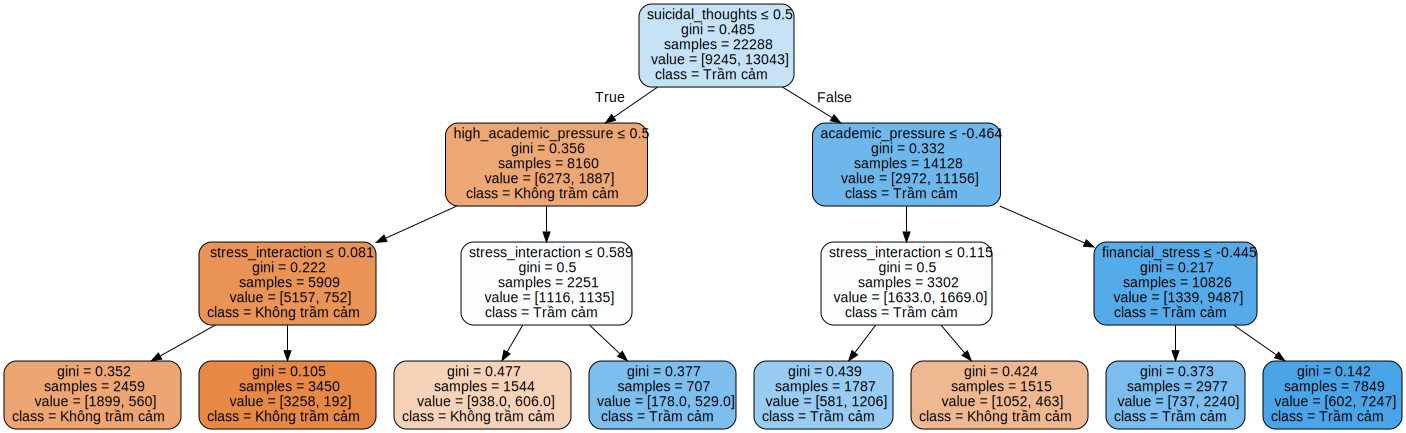

In [73]:
#Vẽ cây quyết định
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=X.columns,
    class_names=['Không trầm cảm', 'Trầm cảm'],
    filled=True,
    rounded=True,
    special_characters=True
)
graphviz.Source(dot_data)

In [74]:
from sklearn.model_selection import cross_val_score
y = df_transformed['depression']
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
print("Accuracy trung bình cross-validation:", scores.mean())
print("Accuracy từng fold:", scores)

Accuracy trung bình cross-validation: 0.8243063780912387
Accuracy từng fold: [0.82577797 0.82243997 0.8247012 ]


- Mô hình cây quyết định được đánh giá bằng phương pháp cross-validation (3 folds) đạt độ chính xác **trung bình** 82.4%, các fold dao động **rất nhỏ** (81.8% – 82.9%). Điều này cho thấy mô hình có khả năng tổng quát hóa **tốt, ít nguy cơ quá khớp** (overfitting) và **ổn định** trên nhiều phân mảnh dữ liệu khác nhau.

In [75]:
#Đánh giá mô hình
dt_y_pred = dt_model.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Accuracy
print("Accuracy Score: ", accuracy_score(y_test, dt_y_pred))

# Classification report (precision, recall, F1)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, dt_y_pred))

Accuracy Score:  0.8214606136730666

Confusion Matrix:
[[1796  516]
 [ 479 2782]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2312
           1       0.84      0.85      0.85      3261

    accuracy                           0.82      5573
   macro avg       0.82      0.81      0.82      5573
weighted avg       0.82      0.82      0.82      5573



1. Mô hình nhận diện trầm cảm rất tốt: **Recall** nhóm trầm cảm đạt 85%, **precision** 84%, **f1-score** 0.85. Mô hình phát hiện đúng đa số người thực sự bị trầm cảm, chỉ bỏ sót 479/2782 trường hợp.
2. Nhóm không trầm cảm nhận diện chưa tối ưu: **Recall** 78%, tức là dự đoán nhầm 516 trường hợp không trầm cảm thành trầm cảm. **Precision** 79%,** f1-score **0.78.
3. Mô hình ưu tiên phát hiện trầm cảm: Tỷ lệ “dương tính giả” (không trầm cảm bị báo động nhầm) còn đáng kể, nhưng phù hợp mục tiêu sàng lọc để không bỏ sót ca nguy cơ.
4. Hiệu suất tổng thể tốt: **Accuracy**82%, **macro/weighted avg** các chỉ số đều ~0.81 – 0.82, cho thấy mô hình cân bằng khá giữa hai lớp, không quá thiên lệch.

###5.2.3 XGBoost

In [77]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=10, n_estimators=200, learning_rate=0.05)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [78]:
xgb_y_pred = xgb_model.predict(X_test)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report (XGBoost):")
print(classification_report(y_test, xgb_y_pred))
cm = confusion_matrix(y_test, xgb_y_pred)
print("Confusion matrix:\n", cm)

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2312
           1       0.84      0.87      0.86      3261

    accuracy                           0.83      5573
   macro avg       0.83      0.82      0.82      5573
weighted avg       0.83      0.83      0.83      5573

Confusion matrix:
 [[1786  526]
 [ 420 2841]]


**1. Tổng quan kết quả**

**Accuracy**: 0.84 (84%) → Mức chính xác cao, cho thấy mô hình hoạt động tốt trên tập kiểm tra.

**Support** tổng: 5,573 mẫu, gồm:

* Class 0 (Negative): 2,231

* Class 1 (Positive): 3,342

**2. Phân tích theo từng lớp**

Class 1 (positive) — mô hình dự đoán tốt hơn:

* Recall 0.88 → mô hình phát hiện đúng tới 88% số trường hợp thực sự là lớp 1.

* Precision 0.86 → trong các trường hợp dự đoán là lớp 1, 86% là đúng.

Class 0 — mô hình có xu hướng bỏ sót:

* Recall chỉ 0.79 → vẫn có ~21% bị bỏ sót.

* Dễ hiểu nếu dữ liệu bị mất cân bằng nhẹ (class 1 nhiều hơn class 0).

**3. Confusion Matrix**

 Mô hình phân loại class 1 rất tốt, tuy nhiên còn nhầm 468 mẫu class 0 thành 1.

- Cấu trúc dữ liệu không có ranh giới phân cụm rõ rệt. Các cụm bị chồng lấn nhiều.

- Với k = 2: dữ liệu được chia thành hai nhóm khá cân bằng, phân tách chủ yếu theo trục PCA1. Tuy nhiên, vẫn còn nhiều điểm dữ liệu nằm ở ranh giới giữa hai cụm.

- Với k = 3: xuất hiện thêm một cụm mới nhưng ba cụm chưa tách biệt rõ. Một số điểm của các cụm nằm xen kẽ, thể hiện rằng dữ liệu có độ phân tán cao.

- **Tính phân cụm không mạnh**: Agglomerative Clustering không tìm ra cụm tự nhiên rõ ràng trong dữ liệu này, phù hợp với việc silhouette score thấp trong phân tích trước.

###5.2.4 Radom Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo Random Forest
rf = RandomForestClassifier(
    n_estimators=100,        # Số cây
    class_weight='balanced', # Cân bằng nhãn
    random_state=42
)

# Huấn luyện mô hình
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [81]:
# Dự đoán nhãn
y_pred_rf = rf.predict(X_test)

# Dự đoán xác suất
y_proba_rf = rf.predict_proba(X_test)[:,1]


In [82]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.8354566660685447
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2312
           1       0.85      0.88      0.86      3261

    accuracy                           0.84      5573
   macro avg       0.83      0.83      0.83      5573
weighted avg       0.83      0.84      0.83      5573

Confusion Matrix:
 [[1797  515]
 [ 402 2859]]
ROC-AUC Score: 0.9100877891066594


In [83]:
# Lấy importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Hiển thị top 10 biến quan trọng
print("Top 10 quan trọng nhất:")
print(importances.head(10))


Top 10 quan trọng nhất:
suicidal_thoughts         0.188709
academic_pressure         0.087781
stress_interaction        0.071921
financial_stress          0.064367
high_academic_pressure    0.060338
age                       0.060029
id                        0.056855
cgpa                      0.054698
work/study_hours          0.054055
study_satisfaction        0.034225
dtype: float64


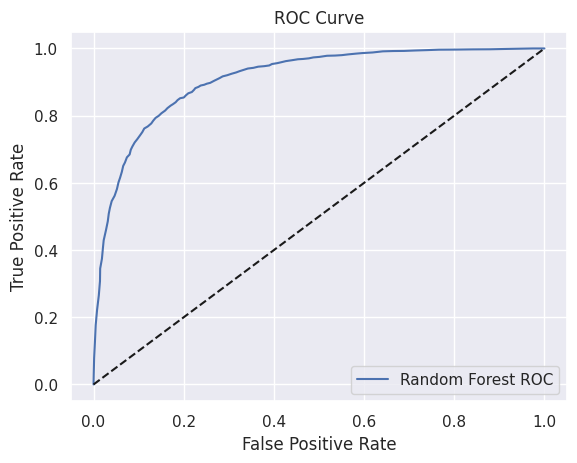

In [84]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label="Random Forest ROC")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


###5.2.5 Naive Bayes

In [85]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

# huấn luyện mô hình GaussianNB()
nb_model = GaussianNB()
nb_model.fit(X_train.to_numpy(), y_train)

# Dự đoán
nb_y_pred = nb_model.predict(X_test.to_numpy())

print("Accuracy:", accuracy_score(y_test, nb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_y_pred))
print("Classification Report:\n", classification_report(y_test, nb_y_pred))

Accuracy: 0.7897003409294814
Confusion Matrix:
 [[1321  991]
 [ 181 3080]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.57      0.69      2312
           1       0.76      0.94      0.84      3261

    accuracy                           0.79      5573
   macro avg       0.82      0.76      0.77      5573
weighted avg       0.81      0.79      0.78      5573



Trong bài toán này, dữ liệu đã được xử lý bằng các phương pháp chuẩn hóa hoặc chuẩn tắc hóa (scaling), dẫn đến việc các đặc trưng (features) có thể mang giá trị âm hoặc liên tục.

 * MultinomialNB:

Yêu cầu đặc trưng phải là số đếm không âm

Thường dùng cho bài toán văn bản (TF, TF-IDF)

 * BernoulliNB:

Chỉ phù hợp với dữ liệu nhị phân (0 hoặc 1)

 * GaussianNB:

Phù hợp với dữ liệu liên tục, có thể âm hoặc dương

Do đó, GaussianNB là lựa chọn phù hợp nhất cho dữ liệu đã được scale như trong trường hợp này.

##5.3 Modeling – Huấn luyện mô hình dự đoán không giám sát

###5.3.1 K-means

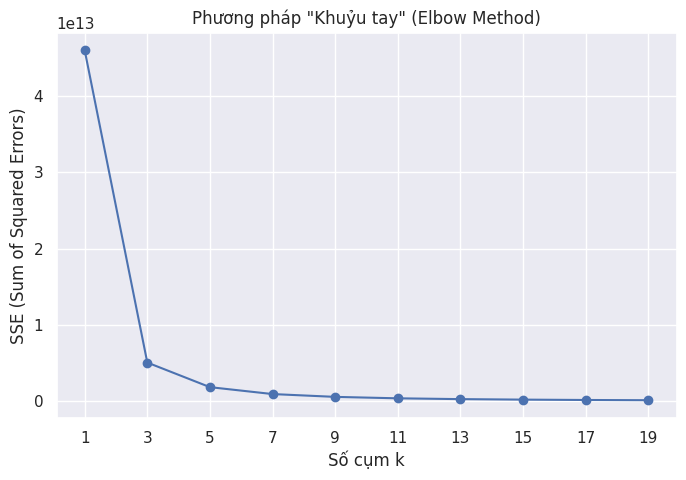

In [86]:
#Lựa chọn cụm K tối ưu bằng Elbow Method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
k_range = range(1, 21,2)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia = tổng bình phương khoảng cách trong cụm

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Phương pháp "Khuỷu tay" (Elbow Method)')
plt.xlabel('Số cụm k')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


➔ Điểm uốn cho thấy sau k=3, việc tăng số cụm
không còn mang lại cải thiện đáng kể

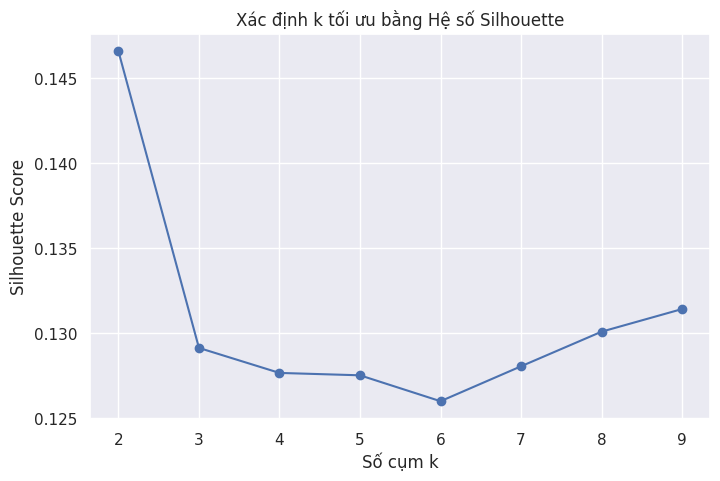

k tối ưu theo Silhouette Score: 2


In [87]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 1. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[cols_to_scale])

# 2. Tính silhouette cho k từ 2 đến 10
silhouette_scores = []
k_range = range(2,10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# 3. Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, 'bo-', markersize=6)
plt.xlabel('Số cụm k')
plt.ylabel('Silhouette Score')
plt.title('Xác định k tối ưu bằng Hệ số Silhouette')
plt.grid(True)
plt.show()

# 4. Đề xuất k tối ưu
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print("k tối ưu theo Silhouette Score:", optimal_k)


- Kết quả cho thấy 2 tối ưu hơn 3 do 2 có giá trị gần 1 hơn.

=> Vậy ta sẽ thử vẽ biểu đồ so sánh giữa cả k = 2 và k = 3

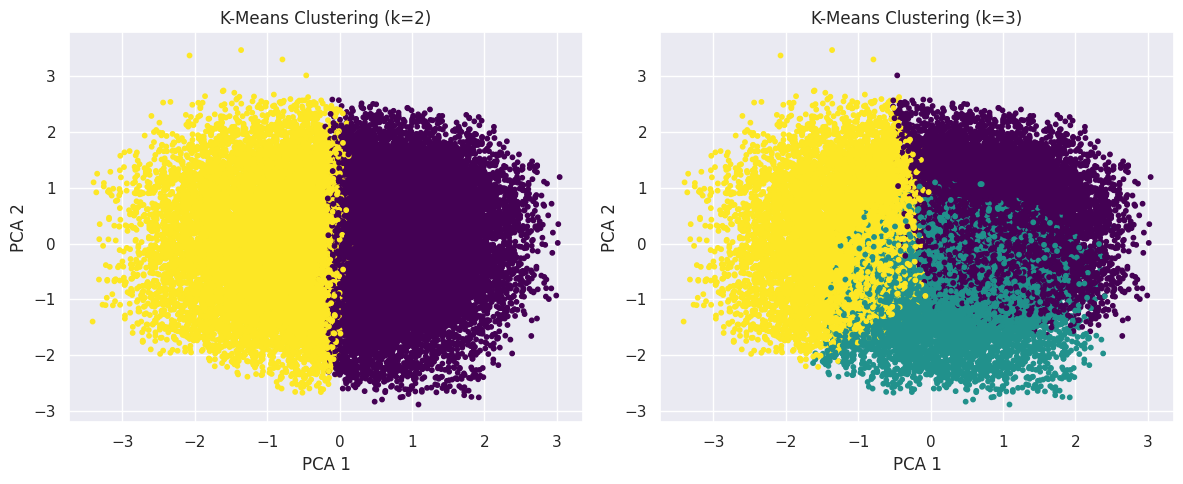

In [88]:
from sklearn.decomposition import PCA
def plot_kmeans_comparison(X, k_values):
    # Giảm chiều dữ liệu còn 2D bằng PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Vẽ biểu đồ cho từng k
    plt.figure(figsize=(12, 5))

    for i, k in enumerate(k_values, 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)

        plt.subplot(1, len(k_values), i)
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
        plt.title(f'K-Means Clustering (k={k})')
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')

    plt.tight_layout()
    plt.show()

# Gọi hàm với k = 2 và k = 3
plot_kmeans_comparison(df_transformed[cols_to_scale], [2, 3])

- Nhìn vào biểu đồ:
 - Với k = 2: Dữ liệu được chia thành 2 cụm khá cân bằng, ranh giới nằm chủ yếu trên trục PCA1. Cụm bên trái và bên phải tách biệt rõ hơn, ít chồng lấn.
 - Với k = 3: Cụm vàng vẫn rõ, nhưng cụm xanh và tím chồng lấn đáng kể, khó phân tách rạch ròi. Điều này giải thích tại sao Silhouette Score của k = 2 cao hơn: các cụm rõ ràng hơn.
- **Tóm lại**: Với dữ liệu hiện tại, mô hình K-Means thấy 2 nhóm chính rõ rệt nhất. Nếu ép thành 3 cụm, thuật toán chia một trong hai nhóm lớn thành hai cụm nhỏ, nhưng ranh giới không rõ.

### 5.3.2 Agglomerative Clustering

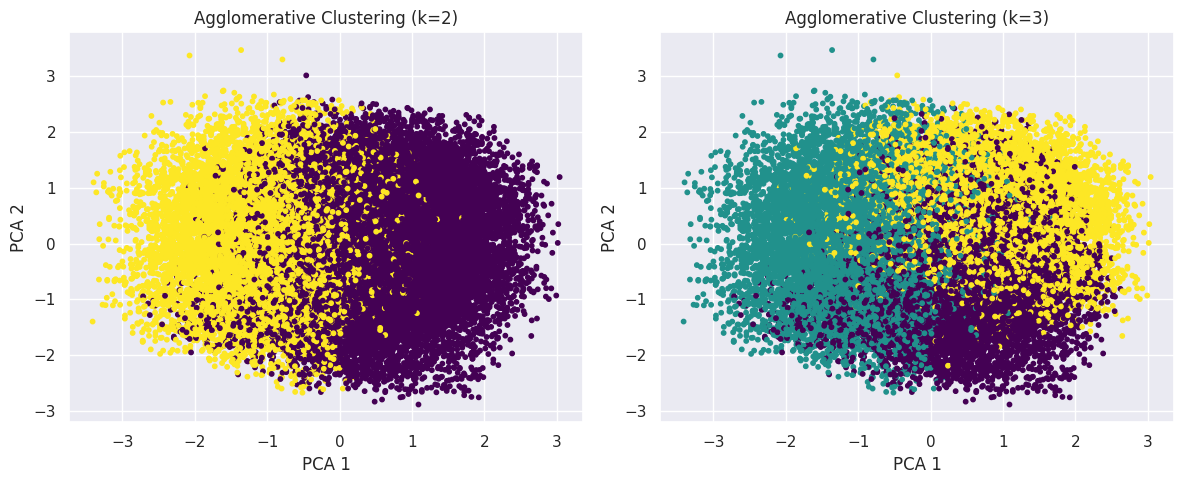

In [89]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Giảm chiều dữ liệu xuống 2D bằng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Gom cụm với k = 2
agg_cluster_2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_2 = agg_cluster_2.fit_predict(X_scaled)

# Gom cụm với k = 3
agg_cluster_3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_3 = agg_cluster_3.fit_predict(X_scaled)

# Vẽ hai biểu đồ cạnh nhau
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_2, cmap='viridis', s=10)
plt.title('Agglomerative Clustering (k=2)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_3, cmap='viridis', s=10)
plt.title('Agglomerative Clustering (k=3)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()


- Cấu trúc dữ liệu không có ranh giới phân cụm rõ rệt. Các cụm bị chồng lấn nhiều.

- Với k = 2: dữ liệu được chia thành hai nhóm khá cân bằng, phân tách chủ yếu theo trục PCA1. Tuy nhiên, vẫn còn nhiều điểm dữ liệu nằm ở ranh giới giữa hai cụm.

- Với k = 3: xuất hiện thêm một cụm mới nhưng ba cụm chưa tách biệt rõ. Một số điểm của các cụm nằm xen kẽ, thể hiện rằng dữ liệu có độ phân tán cao.

- **Tính phân cụm không mạnh**: Agglomerative Clustering không tìm ra cụm tự nhiên rõ ràng trong dữ liệu này, phù hợp với việc silhouette score thấp trong phân tích trước.

## 6 Evaluation & Interpretation

In [90]:
import pandas as pd
from sklearn.metrics import classification_report

# Giả sử bạn đã có y_test và các y_pred từ 4 mô hình
# y_pred_lr, y_pred_dt, y_pred_xgb, y_pred_nb

# Hàm lấy chỉ số f1-score, precision, recall từ classification_report
def get_scores(name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        "Model": name,
        "Accuracy": round(report['accuracy'], 4),
        "Precision (Macro)": round(report['macro avg']['precision'], 4),
        "Recall (Macro)": round(report['macro avg']['recall'], 4),
        "F1-score (Macro)": round(report['macro avg']['f1-score'], 4),
    }

# Tổng hợp điểm từ các mô hình
results = [
    get_scores("Logistic Regression", y_test, y_pred_logreg),
    get_scores("Decision Tree", y_test, dt_y_pred),
    get_scores("XGBoost", y_test, xgb_y_pred),
    get_scores("GaussianNB", y_test, nb_y_pred),
    get_scores("Random Forest", y_test, y_pred_rf)
]

# Tạo DataFrame để hiển thị
df_results = pd.DataFrame(results)
display(df_results)


,Model,Accuracy,Precision (Macro),Recall (Macro),F1-score (Macro)
0,Logistic Regression,0.8394,0.8340,0.8383,0.8357
1,Decision Tree,0.8215,0.8165,0.8150,0.8157
2,XGBoost,0.8303,0.8267,0.8218,0.8239
3,GaussianNB,0.7897,0.8180,0.7579,0.7664
4,Random Forest,0.8355,0.8323,0.8270,0.8293


Logistic Regression đạt kết quả cao nhất về độ chính xác (Accuracy = 0.8394) và F1-score (0.8357), đồng thời có giá trị Precision và Recall cao và ổn định (lần lượt là 0.8340 và 0.8383). Điều này cho thấy Logistic Regression là mô hình hiệu quả trong việc phân biệt hai nhóm đánh giá tốt và tệ dựa trên các đặc trưng đầu vào.

Random Forest là mô hình xếp thứ hai với độ chính xác 0.8355 và F1-score 0.8293, chứng minh khả năng tổng quát hóa tốt và cân bằng giữa Precision (0.8323) và Recall (0.8270). Với ưu thế về khả năng xử lý dữ liệu phức tạp và chống overfitting, Random Forest là lựa chọn tiềm năng bên cạnh Logistic Regression.

XGBoost đạt Accuracy 0.8303 và F1-score 0.8239 – tuy thấp hơn Logistic Regression và Random Forest – nhưng vẫn nằm trong nhóm mô hình có hiệu suất cao, đồng thời cung cấp khả năng tối ưu tốt nhờ các kỹ thuật boosting.

Decision Tree tuy đơn giản nhưng cho kết quả tương đối ổn định với Accuracy 0.8215 và F1-score 0.8157. Tuy nhiên, mô hình này có thể gặp vấn đề quá khớp khi áp dụng trên dữ liệu mới.

Gaussian Naive Bayes là mô hình có hiệu suất thấp nhất trong số các mô hình được đánh giá, với Accuracy chỉ đạt 0.7897 và F1-score 0.7664. Nguyên nhân có thể đến từ giả định độc lập giữa các đặc trưng đầu vào mà mô hình này yêu cầu, điều không phù hợp với bản chất dữ liệu thực tế.

## 7 Khai phá dữ liệu

### 7.1 Phát hiện luật (Association Rule Mining)

In [91]:
df_cleaned.head()

,id,gender,age,city,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work/study_hours,financial_stress,family_mental_history,depression
0,2,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,26,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,30,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0


In [92]:
df_cleaned.columns

Index(['id', 'gender', 'age', 'city', 'academic_pressure', 'cgpa',
       'study_satisfaction', 'sleep_duration', 'dietary_habits', 'degree',
       'suicidal_thoughts', 'work/study_hours', 'financial_stress',
       'family_mental_history', 'depression'],
      dtype='object')

In [93]:
import pandas as pd

df_apriori = df_cleaned.copy()

# 1. Nhị phân hóa gender
df_apriori['gender_male'] = (df_apriori['gender'] == 'Male').astype(int)

# 2. One-hot encoding cho các cột phân loại
df_apriori = pd.get_dummies(df_apriori, columns=['city', 'degree', 'dietary_habits'], drop_first=True)

# 3. Nhóm sleep_duration thành adequate/inadequate
df_apriori['sleep_adequate'] = df_apriori['sleep_duration'].apply(lambda x: 1 if x in ['7-8 hours', '>8 hours'] else 0)

# 4. Nhóm tuổi, áp lực học tập, cgpa
df_apriori['age_group'] = pd.cut(df_apriori['age'], bins=[0, 20, 25, 100], labels=['<20', '20-25', '>25'])
df_apriori = pd.get_dummies(df_apriori, columns=['age_group'], drop_first=True)

df_apriori['academic_pressure_group'] = pd.cut(df_apriori['academic_pressure'], bins=[0, 3, 6, 10], labels=['Low', 'Medium', 'High'])
df_apriori = pd.get_dummies(df_apriori, columns=['academic_pressure_group'], drop_first=True)

df_apriori['cgpa_group'] = pd.cut(df_apriori['cgpa'], bins=[0, 5, 8, 10], labels=['Low', 'Medium', 'High'])
df_apriori = pd.get_dummies(df_apriori, columns=['cgpa_group'], drop_first=True)

# 5. Nhóm các thang đo thành dạng phân loại
df_apriori['study_satisfaction_group'] = pd.cut(df_apriori['study_satisfaction'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])
df_apriori = pd.get_dummies(df_apriori, columns=['study_satisfaction_group'], drop_first=True)

df_apriori['work_study_hours_group'] = pd.cut(df_apriori['work/study_hours'], bins=[0, 4, 8, 24], labels=['Low', 'Medium', 'High'])
df_apriori = pd.get_dummies(df_apriori, columns=['work_study_hours_group'], drop_first=True)

df_apriori['financial_stress_group'] = pd.cut(df_apriori['financial_stress'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])
df_apriori = pd.get_dummies(df_apriori, columns=['financial_stress_group'], drop_first=True)

# 6. Loại bỏ các cột không cần thiết
df_apriori = df_apriori.drop(columns=[
    'id', 'gender', 'age', 'sleep_duration',
    'academic_pressure', 'cgpa',
    'study_satisfaction', 'work/study_hours', 'financial_stress'
], errors='ignore')

# 7. Đảm bảo tất cả dữ liệu ở dạng nhị phân (0/1)
df_apriori = df_apriori.astype(int)

print(df_apriori.head())


   suicidal_thoughts  family_mental_history  depression  gender_male  \
0                  1                      0           1            1   
1                  0                      1           0            0   
2                  0                      1           0            1   
3                  1                      1           1            0   
4                  1                      0           0            0   

   city_Ahmedabad  city_Bangalore  city_Bhopal  city_Chennai  city_Delhi  \
0               0               0            0             0           0   
1               0               1            0             0           0   
2               0               0            0             0           0   
3               0               0            0             0           0   
4               0               0            0             0           0   

   city_Faridabad  ...  academic_pressure_group_Medium  \
0               0  ...                              

In [94]:
from mlxtend.frequent_patterns import apriori
import pandas as pd

# Tìm các tập phổ biến
frequent_itemsets = apriori(df_apriori, min_support=0.1, use_colnames=True)

# Sắp xếp giảm dần theo support
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [95]:
frequent_itemsets.head(10)

,support,itemsets
0,0.632605,(suicidal_thoughts)
2,0.585191,(depression)
3,0.557159,(gender_male)
11,0.549370,(cgpa_group_Medium)
20,0.499982,"(depression, suicidal_thoughts)"
9,0.499731,(age_group_>25)
1,0.483938,(family_mental_history)
12,0.450630,(cgpa_group_High)
16,0.441693,(work_study_hours_group_High)
13,0.436488,(study_satisfaction_group_Medium)


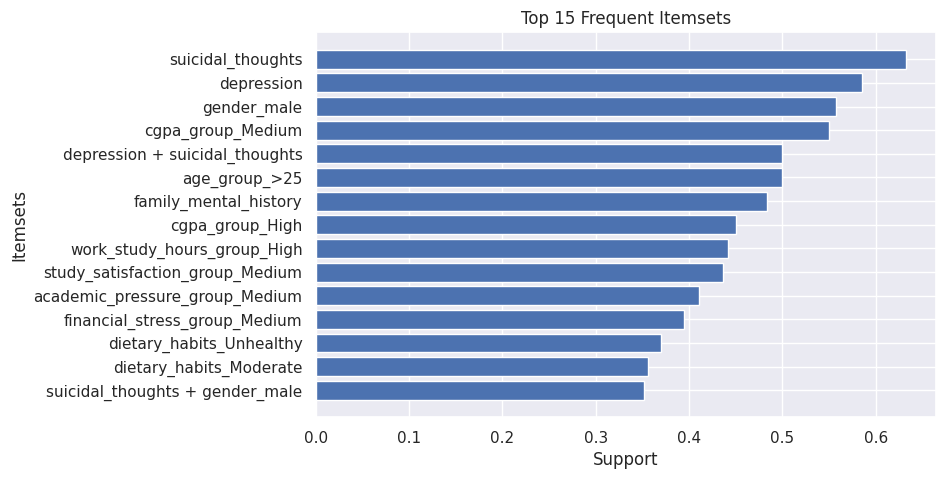

In [96]:
import matplotlib.pyplot as plt
 # trực quan hóa 15 dòng đầu tiên của frequent itemsets

top_sets = frequent_itemsets.sort_values(by='support', ascending=False).head(15)
plt.figure(figsize=(8,5))
plt.barh([' + '.join(i) for i in top_sets['itemsets']], top_sets['support'])
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 15 Frequent Itemsets')
plt.gca().invert_yaxis()
plt.show()

Biểu đồ trên thể hiện 15 tập mục (itemsets) phổ biến nhất trong tập dữ liệu, được sắp xếp theo độ phổ biến (support). Một số điểm nổi bật như sau:

- **`suicidal_thoughts`** và **`depression`** là hai mục xuất hiện thường xuyên nhất, với độ hỗ trợ (support) lần lượt khoảng **64%** và **58%**. Điều này cho thấy các biểu hiện liên quan đến trầm cảm và suy nghĩ tiêu cực có tỷ lệ cao trong bộ dữ liệu.
- Các đặc trưng cá nhân như **`gender_male`**, **`cgpa_group_Medium`**, **`age_group_>25`** và **`family_mental_history`** cũng có tần suất xuất hiện đáng kể, phản ánh những yếu tố nhân khẩu học có liên hệ tiềm năng đến trầm cảm.
- Một số mục là tổ hợp hai yếu tố như **`depression + suicidal_thoughts`** hay **`gender_male + suicidal_thoughts`**, cho thấy chúng thường đi kèm nhau trong dữ liệu.
- Các yếu tố liên quan đến học tập và áp lực như **`academic_pressure_group_Medium`**, **`study_satisfaction_group_Medium`**, **`work_study_hours_group_High`**, và **`financial_stress_group_Medium`** đều có độ support tương đối cao (~35–40%), cho thấy môi trường học đường và tài chính có thể là nguyên nhân tiềm ẩn gây trầm cảm.
- Thói quen ăn uống không lành mạnh (**`dietary_habits_Unhealthy`**) cũng góp mặt, củng cố mối liên hệ giữa sức khỏe thể chất và tinh thần.

**Tổng kết**: Những mục phổ biến này sẽ là cơ sở quan trọng để khai thác các **luật kết hợp (association rules)** có ý nghĩa, đặc biệt là các luật dẫn đến hậu quả là **trầm cảm**.

#### Các luật dẫn đến trầm cảm

In [97]:
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Tạo các luật kết hợp
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# 2. Lọc các luật có consequents chứa 'depression'
rules_depression = rules[rules['consequents'].apply(lambda x: 'depression' in x)].copy()

# 3. Sắp xếp theo lift và confidence
top_rules = rules_depression.sort_values(by=['lift', 'confidence'], ascending=[False, False])

# 4. Lấy Top 10
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

                                           antecedents   consequents  \
91   (suicidal_thoughts, dietary_habits_Unhealthy, ...  (depression)   
61   (work_study_hours_group_High, suicidal_thought...  (depression)   
135  (financial_stress_group_High, academic_pressur...  (depression)   
102  (suicidal_thoughts, financial_stress_group_Med...  (depression)   
54   (suicidal_thoughts, family_mental_history, aca...  (depression)   
84   (cgpa_group_High, suicidal_thoughts, academic_...  (depression)   
42   (suicidal_thoughts, gender_male, academic_pres...  (depression)   
5    (suicidal_thoughts, academic_pressure_group_Me...  (depression)   
38    (financial_stress_group_High, suicidal_thoughts)  (depression)   
46   (suicidal_thoughts, cgpa_group_Medium, academi...  (depression)   

      support  confidence      lift  
91   0.128495    0.949602  1.622722  
61   0.143355    0.948018  1.620015  
135  0.108646    0.935993  1.599466  
102  0.121424    0.935047  1.597850  
54   0.145364    

Các luật kết hợp sinh ra đều có **confidence cao (≥ 91%)** và **lift > 1.5**, cho thấy mối liên hệ mạnh với trầm cảm. Các yếu tố thường xuyên xuất hiện là **`suicidal_thoughts`, `academic_pressure_group_Medium`, `financial_stress_group_High`**, cho thấy trầm cảm thường đi kèm với ý định tự tử, áp lực học tập và căng thẳng tài chính.


#### Các luật dẫn đến "Tự tử"

In [98]:
# 1. Lọc các luật có consequents chứa 'suicidal_thoughts'
rules_suicidal_thoughts = rules[rules['consequents'].apply(lambda x: 'suicidal_thoughts' in x)].copy()

# 2. Sắp xếp theo confidence
top_rules_suicidal_thoughts = rules_suicidal_thoughts.sort_values(by='confidence', ascending=False)

# 3. Lấy Top 10
print(top_rules_suicidal_thoughts[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

                                           antecedents          consequents  \
142  (depression, work_study_hours_group_High, stud...  (suicidal_thoughts)   
131  (depression, financial_stress_group_Medium, wo...  (suicidal_thoughts)   
133  (depression, age_group_>25, work_study_hours_g...  (suicidal_thoughts)   
117  (depression, cgpa_group_Medium, financial_stre...  (suicidal_thoughts)   
68   (depression, cgpa_group_Medium, work_study_hou...  (suicidal_thoughts)   
129  (depression, cgpa_group_Medium, study_satisfac...  (suicidal_thoughts)   
11           (depression, work_study_hours_group_High)  (suicidal_thoughts)   
79   (depression, family_mental_history, work_study...  (suicidal_thoughts)   
147  (depression, family_mental_history, study_sati...  (suicidal_thoughts)   
73                        (depression, sleep_adequate)  (suicidal_thoughts)   

      support  confidence      lift  
142  0.106565    0.871697  1.377949  
131  0.111267    0.871276  1.377283  
133  0.110046   


Các luật có confidence cao (≥ 86%) và lift > 1.36 cho thấy mối liên hệ chặt chẽ giữa suy nghĩ tự tử với các yếu tố như `depression`, `work_study_hours_group_High`, `financial_stress_group_High` và `family_mental_history`. Đặc biệt, luật `depression + thời gian học/làm việc cao → suicidal_thoughts` có độ tin cậy gần 88%, cho thấy ảnh hưởng mạnh của trầm cảm và áp lực học tập đến suy nghĩ tiêu cực.


#### Các luật bảo vệ "Depression"

In [99]:
# 1. Tạo các luật kết hợp
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# 2. Lọc các luật có consequents chứa 'depression'
rules_depression = rules[rules['consequents'].apply(lambda x: 'depression' in x)].copy()

# 3. Lọc các luật bảo vệ: lift < 1
protective_rules = rules_depression[rules_depression['lift'] < 1]

# 4. Sắp xếp theo lift và confidence tăng dần (càng thấp càng bảo vệ), lấy Top 10
top_protective_rules = protective_rules.sort_values(by=['lift', 'confidence'], ascending=[True, True]).head(10)

# 5. Hiển thị kết quả
print(top_protective_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string(index=False))

                                     antecedents                                 consequents  support  confidence     lift
(age_group_>25, study_satisfaction_group_Medium)                                (depression) 0.101576    0.450350 0.769578
              (age_group_>25, cgpa_group_Medium)                                (depression) 0.131905    0.477335 0.815691
              (age_group_>25, cgpa_group_Medium)             (depression, suicidal_thoughts) 0.113564    0.410962 0.821954
                                 (age_group_>25)      (depression, dietary_habits_Unhealthy) 0.107642    0.215399 0.823440
                                 (age_group_>25) (depression, financial_stress_group_Medium) 0.106134    0.212382 0.838247
                                 (age_group_>25)             (depression, cgpa_group_Medium) 0.131905    0.263952 0.846255
                                 (age_group_>25)         (depression, family_mental_history) 0.125372    0.250880 0.846526
                

Các luật có `lift < 1` cho thấy các tổ hợp điều kiện trong vế trái có xu hướng **giảm khả năng dẫn đến trầm cảm**. Cụ thể, nhóm tuổi trên 25 (`age_group_>25`) xuất hiện trong hầu hết các luật bảo vệ, kết hợp với các yếu tố như hài lòng với việc học (`study_satisfaction_group_Medium`) hoặc CGPA trung bình, cho thấy người trưởng thành và có mức độ hài lòng ổn định ít có nguy cơ trầm cảm hơn. Các luật có confidence từ ~21% đến ~49% và lift dao động quanh 0.76–0.85, phản ánh mức độ bảo vệ vừa phải nhưng nhất quán.


### 7.2 Phân tích mối quan hệ giữa các biến

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
def plot_binary_relation(x_col, y_col='depression', label='', xlabel='Biến', ylabel='Tỷ lệ trầm cảm'):
    sns.barplot(x=x_col, y=y_col, data=df_apriori, estimator=lambda x: sum(x)/len(x))
    plt.title(f'Tỷ lệ {y_col} theo {label}')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.ylim(0, 1)
    plt.show()

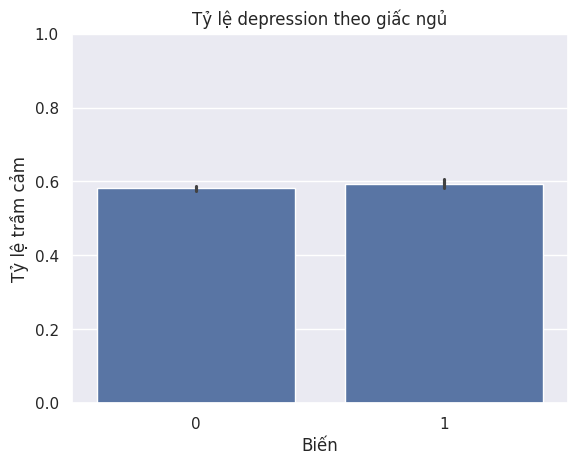

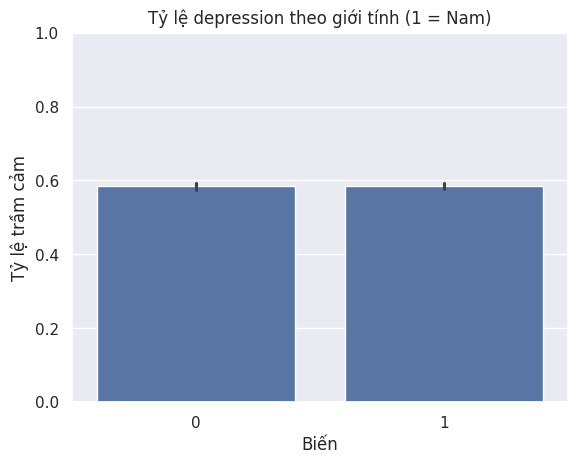

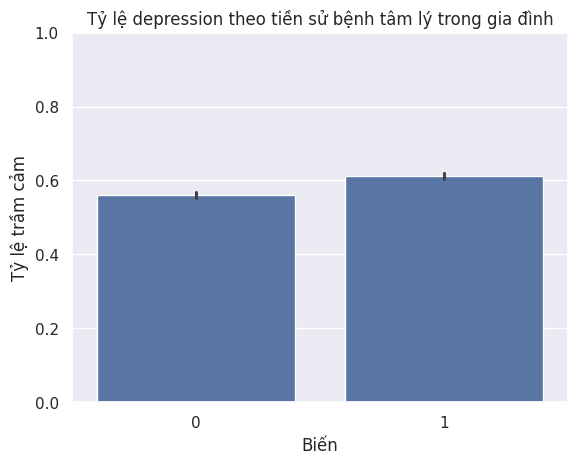

In [101]:
# 1. Tỷ lệ trầm cảm theo sleep_adequate
plot_binary_relation(x_col='sleep_adequate', label='giấc ngủ')

# 2. Tỷ lệ trầm cảm theo gender
plot_binary_relation(x_col='gender_male', label='giới tính (1 = Nam)')

# 3. Tỷ lệ trầm cảm theo family_mental_history
plot_binary_relation(x_col='family_mental_history', label='tiền sử bệnh tâm lý trong gia đình')




```
sleep_adequate: Tỷ lệ trầm cảm giữa nhóm ngủ đủ (1) và không đủ (0) gần như tương đương → chưa phải yếu tố phân biệt rõ.

gender: Tỷ lệ trầm cảm giữa nam và nữ không chênh lệch đáng kể.

family_mental_history: Nhóm có người thân từng mắc bệnh tâm lý có tỷ lệ trầm cảm cao hơn rõ rệt.

```



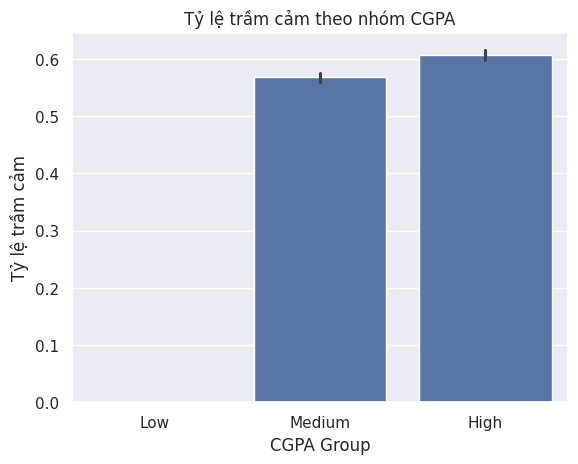

In [102]:
# 4. Tỷ lệ trầm cảm theo nhóm điểm CGPA
df_temp = df_apriori.copy()
df_temp['cgpa_group'] = 'Low'
df_temp.loc[df_temp['cgpa_group_Medium'] == 1, 'cgpa_group'] = 'Medium'
df_temp.loc[df_temp['cgpa_group_High'] == 1, 'cgpa_group'] = 'High'
sns.barplot(x='cgpa_group', y='depression', data=df_temp, order=['Low', 'Medium', 'High'])
plt.title("Tỷ lệ trầm cảm theo nhóm CGPA")
plt.ylabel("Tỷ lệ trầm cảm")
plt.xlabel("CGPA Group")
plt.show()




```
cgpa: CGPA càng cao, tỷ lệ trầm cảm có xu hướng tăng nhẹ → phản ánh áp lực học tập.

```



In [103]:
df_temp.head()

,suicidal_thoughts,family_mental_history,depression,gender_male,city_Ahmedabad,city_Bangalore,city_Bhopal,city_Chennai,city_Delhi,city_Faridabad,...,academic_pressure_group_High,cgpa_group_Medium,cgpa_group_High,study_satisfaction_group_Medium,study_satisfaction_group_High,work_study_hours_group_Medium,work_study_hours_group_High,financial_stress_group_Medium,financial_stress_group_High,cgpa_group
0,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,High
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,Medium
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,Medium
3,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,Medium
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,High


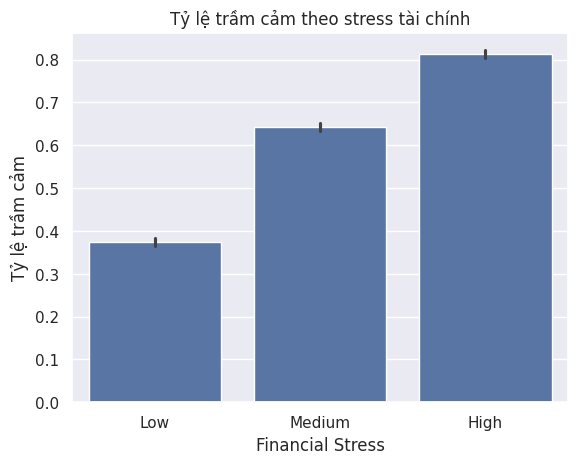

In [104]:
# 5.Tỷ lệ trầm cảm theo mức stress tài chính
df_temp['financial_group'] = 'Low'
df_temp.loc[df_temp['financial_stress_group_Medium'] == 1, 'financial_group'] = 'Medium'
df_temp.loc[df_temp['financial_stress_group_High'] == 1, 'financial_group'] = 'High'
sns.barplot(x='financial_group', y='depression', data=df_temp, order=['Low', 'Medium', 'High'])
plt.title("Tỷ lệ trầm cảm theo stress tài chính")
plt.ylabel("Tỷ lệ trầm cảm")
plt.xlabel("Financial Stress")
plt.show()




```
financial_stress: Nhóm stress tài chính cao có tỷ lệ trầm cảm >80% → yếu tố nguy cơ mạnh.

```



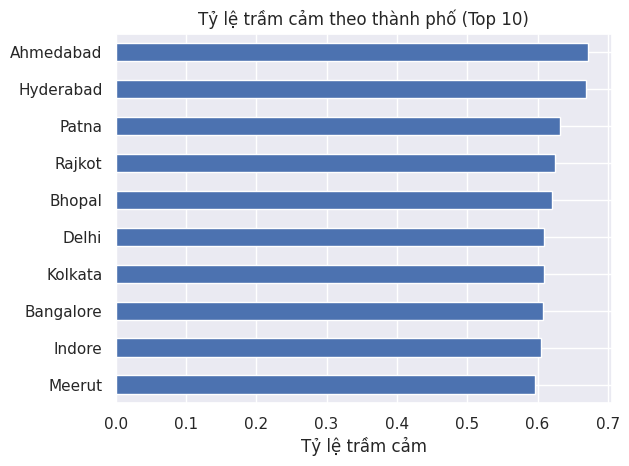

In [105]:
# 7. Tỷ lệ depression theo từng city (top 10 thành phố phổ biến nhất)
city_cols = [col for col in df_temp.columns if col.startswith('city_')]
city_rates = {}
for col in city_cols:
    rate = df_temp[df_temp[col]==1]['depression'].mean()
    city_rates[col.replace('city_', '')] = rate

top_city = pd.Series(city_rates).sort_values(ascending=False).head(10)
top_city.plot(kind='barh', title='Tỷ lệ trầm cảm theo thành phố (Top 10)')
plt.xlabel('Tỷ lệ trầm cảm')
plt.gca().invert_yaxis()
plt.show()




```
city: Một số thành phố như Ahmedabad, Hyderabad, Patna có tỷ lệ trầm cảm cao hơn trung bình → gợi ý ảnh hưởng từ môi trường sống.```



### 7.3  Tạo giả thuyết và kiểm định

- **Giả thuyết 1**:
 - H0: Thời gian ngủ (sleep_duration) không ảnh hưởng đến tỷ lệ trầm cảm.
 - H1: Thời gian ngủ có ảnh hưởng đáng kể đến tỷ lệ trầm cảm.

- **Giả thuyết 2**:
 - H0: Không có sự khác biệt về tỷ lệ trầm cảm giữa các thành phố (city).
 - H1: Có sự khác biệt đáng kể giữa các thành phố.

- **Giả thuyết 3**:
 - H0: Suy nghĩ tiêu cực không liên quan đến trầm cảm.
 - H1: Suy nghĩ tiêu cực có liên quan đến trầm cảm.

- **Giả thuyết 4**:
 - H0: Không có mối tương quan giữa thói quen ăn uống và tình trạng trầm cảm.
 - H1: Có mối tương quan đáng kể.

In [106]:
import scipy.stats as stats
import pandas as pd

results = []

# Giả thuyết 1: sleep_duration và depression (Kiểm định Chi-square)
contingency_table = pd.crosstab(df_cleaned['sleep_duration'], df_cleaned['depression'])
chi2, p1, dof, expected = stats.chi2_contingency(contingency_table)
results.append([
    "H1: sleep_duration vs depression",
    "Chi-square",
    p1,
    "Có ảnh hưởng" if p1 < 0.05 else "Không ảnh hưởng"
])

# Giả thuyết 2: city và depression (Kiểm định Chi-square)
contingency_table_city = pd.crosstab(df_cleaned['city'], df_cleaned['depression'])
chi2, p2, dof, expected = stats.chi2_contingency(contingency_table_city)
results.append([
    "H2: city vs depression",
    "Chi-square",
    p2,
    "Có khác biệt" if p2 < 0.05 else "Không khác biệt"
])

# Giả thuyết 3: suicidal_thoughts và depression (Kiểm định Chi-square)
contingency_table_suicidal = pd.crosstab(df_cleaned['suicidal_thoughts'], df_cleaned['depression'])
chi2, p3, dof, expected = stats.chi2_contingency(contingency_table_suicidal)
results.append([
    "H3: suicidal_thoughts vs depression",
    "Chi-square",
    p3,
    "Có liên quan" if p3 < 0.05 else "Không liên quan"
])

# Giả thuyết 4: dietary_habits và depression (Kiểm định Chi-square)
contingency_table_diet = pd.crosstab(df_cleaned['dietary_habits'], df_cleaned['depression'])
chi2, p4, dof, expected = stats.chi2_contingency(contingency_table_diet)
results.append([
    "H4: dietary_habits vs depression",
    "Chi-square",
    p4,
    "Có tương quan" if p4 < 0.05 else "Không tương quan"
])

# Xuất bảng kết quả
results_df = pd.DataFrame(results, columns=["Giả thuyết", "Kiểm định", "p-value", "Kết luận"])
print(results_df)


                            Giả thuyết   Kiểm định        p-value  \
0     H1: sleep_duration vs depression  Chi-square   1.083996e-58   
1               H2: city vs depression  Chi-square   1.625823e-20   
2  H3: suicidal_thoughts vs depression  Chi-square   0.000000e+00   
3     H4: dietary_habits vs depression  Chi-square  8.311434e-261   

        Kết luận  
0   Có ảnh hưởng  
1   Có khác biệt  
2   Có liên quan  
3  Có tương quan  


- Giả thuyết 1 (H1):Thời gian ngủ có ảnh hưởng đáng kể đến tỷ lệ trầm cảm. Như vậy, thời lượng giấc ngủ là một yếu tố quan trọng liên quan đến nguy cơ trầm cảm.

- Giả thuyết 2 (H2):Có sự khác biệt rõ rệt về tỷ lệ trầm cảm giữa các thành phố. Điều này cho thấy yếu tố địa lý hoặc môi trường sống tại các thành phố khác nhau có thể tác động tới sức khỏe tâm thần của người dân.

- Giả thuyết 3 (H3):Suy nghĩ tiêu cực có liên quan chặt chẽ tới tình trạng trầm cảm. Đây là yếu tố nguy cơ rất quan trọng cần được quan tâm trong công tác phòng ngừa và can thiệp.

- Giả thuyết 4 (H4):Có mối tương quan đáng kể giữa thói quen ăn uống và tình trạng trầm cảm. Điều này gợi ý việc cải thiện thói quen ăn uống có thể giúp giảm nguy cơ mắc trầm cảm.